# **Tim 23B** : **Analisis Cluster Pelanggan Berdasarkan Perilaku Pelanggan Dan Tren Pembelian Produk Berbasis Lokasi**


**BADAK BERIKILAU :**
1.   Moh.Syihabuddin
2.   Sisfy Anjani
3.   Hani Agustina
4.   Aprilia Tri Widiyastuti
5.   Ikhsan Danu Nugroho
6.   Muhammad Kautsar

[Dataset 1](https://drive.google.com/drive/folders/1Rp8GhBFQ_hgQeTwHNP0xtdQSbacxvyPM?usp=sharing)



In [ ]:
#connect to drive
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

# DATA PREPROCESSING

## Informasi Data

#### User



In [ ]:
user = pd.read_csv('/content/drive/MyDrive/Tim23BFinalProjectDrive/dataset 1/user.csv')
user

,id,full_name,gender,money_spent,refund,wallet_balance,join_date,birth
0,SC7502062007001,PRIYANTI FIORI,perempuan,2270000.0,130000.0,480000.0,2023-11-05,1984-07-25
1,SC7502062007002,KURNIA MUHAMAD WANIMBO,laki-laki,2370000.0,140000.0,500000.0,2023-12-27,1991-02-12
2,SC7502062007003,AJENG LESTARI,perempuan,0.0,0.0,0.0,2024-07-19,1982-06-18
3,SC7502062007004,TIA IRIANI S.E.,perempuan,0.0,0.0,0.0,2024-05-24,1972-09-27
4,SC7502062006001,ANCE,perempuan,0.0,0.0,0.0,2024-11-25,1992-06-11
...,...,...,...,...,...,...,...,...
427481,SC1212102018001,ACHMAD,laki-laki,1040000.0,60000.0,360000.0,2023-10-14,1982-10-20
427482,SC1212102018004,AJIE AHMAD Masykur,laki-laki,1510000.0,60000.0,550000.0,2023-12-04,1997-08-03
427483,SC1212102008001,WIWIN WAHYUNI,perempuan,2120000.0,100000.0,800000.0,2023-12-10,1978-12-17
427484,SC1212102010001,NYIMAS,perempuan,1700000.0,50000.0,490000.0,2023-10-18,1993-04-04


*  Terdapat 427.486 baris dengan 8 kolom yaitu kolom
1. **id** : untuk menyatakan kode provinsi dan kecamatan
2. **full_name** : untuk nama pengguna
3. **gender** : jenis kelamin pengguna
4. **money_spent** : jumlah pembelian dari pelanggan
5. **refund** : uang kembalian yang diterima pelanggan
6. **wallet_balance** : total saldo yang dimiliki pelanggan
7. **join_date** : tanggal pelanggan bergabung
8. **birth** : ulang tahun pelanggan





#### Product

In [ ]:
product = pd.read_csv('/content/drive/MyDrive/Tim23BFinalProjectDrive/dataset 1/product_reference.csv', sep=';')
product

,id,product name
0,1,Man Fashion
1,2,Woman Fashion
2,3,Food & Drink
3,4,Ride Hailing
4,5,Keperluan Rumah Tangga
5,6,Travel
6,7,Keperluan Anak
7,8,Elektronik
8,9,Other
9,10,"Transportasi (Kereta, Pesawat, Kapal)"


* Terdapat 18 referensi product yang tersedia dengan kode sesuai nomor id.



#### Lokasi

In [ ]:
lokasi = pd.read_csv('/content/drive/MyDrive/Tim23BFinalProjectDrive/dataset 1/location_reference.csv')
lokasi

,nama provinsi,kode provinsi,nama kabupaten,kode kabupaten,nama kecamatan,kode kecamatan
0,GORONTALO,75,BOALEMO,7502,BOTUMOITO,750206
1,GORONTALO,75,BOALEMO,7502,DULUPI,750203
2,GORONTALO,75,BOALEMO,7502,MANANGGU,750205
3,GORONTALO,75,BOALEMO,7502,PAGUYAMAN,750201
4,GORONTALO,75,BOALEMO,7502,PAGUYAMAN PANTAI,750207
...,...,...,...,...,...,...
7402,SUMATERA UTARA,12,TOBA,1212,SIANTAR NARUMONDA,121220
7403,SUMATERA UTARA,12,TOBA,1212,SIGUMPAR,121219
7404,SUMATERA UTARA,12,TOBA,1212,SILAEN,121203
7405,SUMATERA UTARA,12,TOBA,1212,TAMPAHAN,121222


* Terdapat 7.407 baris dengan 6 kolom yang mewakilkan wilayah provinsi dan kecamatan dengan kode masing-masing.



#### Team Trx

In [ ]:
team_trx = pd.read_excel('/content/drive/MyDrive/Tim23BFinalProjectDrive/dataset 1/Team Trx Data.xlsx')
team_trx

,Team,Level1,Level2,Level3,Level4
0,1,35,74,75,82
1,2,32,17,18,65
2,3,32,13,14,96
3,4,35,17,18,94
4,5,33,71,72,82
...,...,...,...,...,...
107,108,32,63,64,81
108,109,33,52,53,91
109,110,32,13,14,94
110,111,32,15,16,91


* Terdapat 112 baris artinya ada peluang untuk 112 tim dengan level 1 sampai 4 yang menunnjukan kode provinsi pada setiap level.
Serta menunjukkan kategori masing-masing wilayah berdasarkan Level, seperti Level 1 yang wilayah Provinsinya memiliki jumlah Kabupaten dan Kecamatan yang cukup banyak.



#### Provinsi

In [ ]:
print(team_trx.to_string())

     Team  Level1  Level2  Level3  Level4
0       1      35      74      75      82
1       2      32      17      18      65
2       3      32      13      14      96
3       4      35      17      18      94
4       5      33      71      72      82
5       6      33      11      12      96
6       7      32      11      12      93
7       8      33      17      18      82
8       9      35      16      17      94
9      10      32      11      12      82
10     11      32      62      63      93
11     12      33      12      13      92
12     13      32      71      72      81
13     14      32      52      53      93
14     15      32      63      64      65
15     16      35      71      72      94
16     17      35      61      62      81
17     18      33      62      63      81
18     19      33      12      13      96
19     20      35      73      74      81
20     21      33      17      18      65
21     22      35      61      62      65
22     23      33      11      12 

90.


> 35 Jawa Timur

> 18 Lampung

> 19 Kepulauan Bangka Belitung

> 65 Kalimantan Utara

Analisis dari 4 Provinsi :
1. **Jawa Tengah**: Merupakan salah satu provinsi yang memiliki peran penting dalam sejarah dan budaya Indonesia. Terletak di Pulau Jawa, Jawa Tengah memiliki banyak situs bersejarah seperti Candi Borobudur dan Candi Prambanan. Secara ekonomi, Jawa Tengah juga memiliki peran yang signifikan karena menjadi pusat industri dan perdagangan.

2. **Lampung**: Terletak di bagian selatan Pulau Sumatra, Lampung memiliki keindahan alam yang menakjubkan, termasuk pantai-pantai yang eksotis dan Gunung Krakatau. Lampung juga terkenal dengan kebudayaannya yang kaya, seperti Tari Piring dan Tari Gending Sriwijaya. Secara ekonomi, Lampung memiliki potensi besar dalam sektor pertanian dan perkebunan.

3. **Kepulauan Bangka Belitung**: Terletak di lepas pantai timur Sumatra, provinsi ini terkenal dengan keindahan pantainya dan tambang timahnya yang kaya. Selain itu, Kepulauan Bangka Belitung juga memiliki budaya yang unik, terutama dalam hal seni dan kerajinan tangan.

4. **Kalimantan Utara**: Merupakan provinsi termuda di Indonesia, terbentuk pada tahun 2012. Terletak di Pulau Kalimantan bagian utara, provinsi ini memiliki potensi besar dalam sektor kehutanan dan pertambangan. Kalimantan Utara juga kaya akan keanekaragaman hayati dan budaya suku-suku Dayak.

##### 35 Jawa Timur

referensi : https://p2k.stekom.ac.id/ensiklopedia/Daftar_kecamatan_dan_kelurahan_di_Jawa_Timur#:~:text=Provinsi%20Jawa%20Timur%20terdiri%20dari,luas%20wilayah%2048.033%2C00%20km%C2%B2.

In [ ]:
#Provinsi Jawa Timur
provinsi_35 = lokasi[lokasi['kode provinsi'] == 35]
provinsi_35

,nama provinsi,kode provinsi,nama kabupaten,kode kabupaten,nama kecamatan,kode kecamatan
6286,JAWA TIMUR,35,BANGKALAN,3526,AROSBAYA,352605
6287,JAWA TIMUR,35,BANGKALAN,3526,BANGKALAN,352601
6288,JAWA TIMUR,35,BANGKALAN,3526,BLEGA,352615
6289,JAWA TIMUR,35,BANGKALAN,3526,BURNEH,352603
6290,JAWA TIMUR,35,BANGKALAN,3526,GALIS,352618
...,...,...,...,...,...,...
6947,JAWA TIMUR,35,TULUNGAGUNG,3504,REJOTANGAN,350413
6948,JAWA TIMUR,35,TULUNGAGUNG,3504,SENDANG,350407
6949,JAWA TIMUR,35,TULUNGAGUNG,3504,SUMBERGEMPOL,350410
6950,JAWA TIMUR,35,TULUNGAGUNG,3504,TANGGUNGGUNUNG,350419


In [ ]:
provinsi_35.isna().info()

<class 'pandas.core.frame.DataFrame'>
Index: 666 entries, 6286 to 6951
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   nama provinsi   666 non-null    bool 
 1   kode provinsi   666 non-null    bool 
 2   nama kabupaten  666 non-null    bool 
 3   kode kabupaten  666 non-null    bool 
 4   nama kecamatan  666 non-null    bool 
 5   kode kecamatan  666 non-null    bool 
dtypes: bool(6)
memory usage: 9.1 KB


In [ ]:
jumlah_kabupaten = provinsi_35.groupby('nama kabupaten').size()
jumlah_kabupaten

nama kabupaten
BANGKALAN           18
BANYUWANGI          25
BLITAR              22
BOJONEGORO          28
BONDOWOSO           23
GRESIK              18
JEMBER              31
JOMBANG             21
KEDIRI              26
KOTA BATU            3
KOTA BLITAR          3
KOTA KEDIRI          3
KOTA MADIUN          3
KOTA MALANG          5
KOTA MOJOKERTO       3
KOTA PASURUAN        4
KOTA PROBOLINGGO     5
KOTA SURABAYA       31
LAMONGAN            27
LUMAJANG            21
MADIUN              15
MAGETAN             18
MALANG              33
MOJOKERTO           18
NGANJUK             20
NGAWI               19
PACITAN             12
PAMEKASAN           13
PASURUAN            24
PONOROGO            21
PROBOLINGGO         24
SAMPANG             14
SIDOARJO            18
SITUBONDO           17
SUMENEP             27
TRENGGALEK          14
TUBAN               20
TULUNGAGUNG         19
dtype: int64

In [ ]:
len(jumlah_kabupaten)

38

In [ ]:
total_kabupaten = provinsi_35['kode kabupaten'].unique()

total_kabupaten

array(['3526', '3510', '3505', '3522', '3511', '3525', '3509', '3517',
       '3506', '3579', '3572', '3571', '3577', '3573', '3576', '3575',
       '3574', '3578', '3524', '3508', '3519', '3520', '3507', '3516',
       '3518', '3521', '3501', '3528', '3514', '3502', '3513', '3527',
       '3515', '3512', '3529', '3503', '3523', '3504'], dtype=object)

In [ ]:
jumlah_kecamatan = provinsi_35.groupby('kode kecamatan').size()

jumlah_kecamatan

kode kecamatan
350101    1
350102    1
350103    1
350104    1
350105    1
         ..
357830    1
357831    1
357901    1
357902    1
357903    1
Length: 666, dtype: int64

In [ ]:
len(jumlah_kecamatan)

666

In [ ]:
# Melihat salah satu nama kecamatan
total_kecamatan = provinsi_35['nama kecamatan'].unique()

total_kecamatan[10]

'KWANYAR'



> Pada **Provinsi Jawa Tengah** terdapat **38 Kabupaten** dengan **666 Kecamatan.**



##### 18 Lampung

referensi :https://id.wikipedia.org/wiki/Lampung#

https://ppid.lampungprov.go.id/detail-post/Jumlah-Kecamatan-dan-Desa-Kelurahan-Di-Provinsi-Lampung#:~:text=Berdasarkan%20data%20BPS%20tahun%202022,yang%20tersebar%20di%20Provinsi%20Lampung.

In [ ]:
#Provinsi Lampung
provinsi_18 = lokasi[lokasi['kode provinsi'] == 18]
provinsi_18

,nama provinsi,kode provinsi,nama kabupaten,kode kabupaten,nama kecamatan,kode kecamatan
2525,LAMPUNG,18,KOTA BANDAR LAMPUNG,1871,BUMI WARAS,187120
2526,LAMPUNG,18,KOTA BANDAR LAMPUNG,1871,ENGGAL,187117
2527,LAMPUNG,18,KOTA BANDAR LAMPUNG,1871,KEDAMAIAN,187118
2528,LAMPUNG,18,KOTA BANDAR LAMPUNG,1871,KEDATON,187101
2529,LAMPUNG,18,KOTA BANDAR LAMPUNG,1871,KEMILING,187113
...,...,...,...,...,...,...
2749,LAMPUNG,18,WAY KANAN,1808,NEGERI BESAR,180812
2750,LAMPUNG,18,WAY KANAN,1808,PAKUAN RATU,180806
2751,LAMPUNG,18,WAY KANAN,1808,REBANG TANGKAS,180809
2752,LAMPUNG,18,WAY KANAN,1808,UMPU SEMENGUK,180815


In [ ]:
provinsi_18.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229 entries, 2525 to 2753
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   nama provinsi   229 non-null    object
 1   kode provinsi   229 non-null    int64 
 2   nama kabupaten  229 non-null    object
 3   kode kabupaten  229 non-null    object
 4   nama kecamatan  229 non-null    object
 5   kode kecamatan  229 non-null    object
dtypes: int64(1), object(5)
memory usage: 20.6+ KB


In [ ]:
jumlah_kabupaten = provinsi_18.groupby('nama kabupaten').size()
jumlah_kabupaten

nama kabupaten
KOTA BANDAR LAMPUNG    20
KOTA METRO              5
LAMPUNG BARAT          15
LAMPUNG SELATAN        17
LAMPUNG TENGAH         28
LAMPUNG TIMUR          24
LAMPUNG UTARA          23
MESUJI                  7
PESAWARAN              11
PESISIR BARAT          11
PRINGSEWU               9
TANGGAMUS              20
TULANG BAWANG          15
TULANG BAWANG BARAT     9
WAY KANAN              15
dtype: int64

In [ ]:
len(jumlah_kabupaten)

15

In [ ]:
jumlah_kecamatan = provinsi_18.groupby('kode kecamatan').size()
jumlah_kecamatan

kode kecamatan
180104    1
180105    1
180106    1
180107    1
180108    1
         ..
187201    1
187202    1
187203    1
187204    1
187205    1
Length: 229, dtype: int64

In [ ]:
len(jumlah_kecamatan)

229



> Pada **Provinsi Lampung** terdapat **15 Kabupaten** dengan **229 Kecamatan.**




##### 19 Kepulauan Bangka Belitung

referensi : https://perkim.id/profil-pkp/profil-provinsi/profil-perumahan-dan-kawasan-permukiman-provinsi-bangka-belitung/

https://id.wikipedia.org/wiki/Daftar_kecamatan_dan_kelurahan_di_Kepulauan_Bangka_Belitung#:~:text=Provinsi%20Kepulauan%20Bangka%20Belitung%20terdiri,82%20kelurahan%20dan%20309%20desa.

https://regionalinvestment.bkpm.go.id/pir/daerah/?id=19

In [ ]:
#Provinsi Kepulauan Bangka Belitung
provinsi_19 = lokasi[lokasi['kode provinsi'] == 19]
provinsi_19

,nama provinsi,kode provinsi,nama kabupaten,kode kabupaten,nama kecamatan,kode kecamatan
584,KEPULAUAN BANGKA BELITUNG,19,BANGKA,1901,BAKAM,190106
585,KEPULAUAN BANGKA BELITUNG,19,BANGKA,1901,BELINYU,190102
586,KEPULAUAN BANGKA BELITUNG,19,BANGKA,1901,MENDO BARAT,190104
587,KEPULAUAN BANGKA BELITUNG,19,BANGKA,1901,MERAWANG,190103
588,KEPULAUAN BANGKA BELITUNG,19,BANGKA,1901,PEMALI,190105
589,KEPULAUAN BANGKA BELITUNG,19,BANGKA,1901,PUDING BESAR,190108
590,KEPULAUAN BANGKA BELITUNG,19,BANGKA,1901,RIAU SILIP,190107
591,KEPULAUAN BANGKA BELITUNG,19,BANGKA,1901,SUNGAILIAT,190101
592,KEPULAUAN BANGKA BELITUNG,19,BANGKA BARAT,1905,JEBUS,190503
593,KEPULAUAN BANGKA BELITUNG,19,BANGKA BARAT,1905,KELAPA,190504


In [ ]:
provinsi_19.isna().info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, 584 to 630
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   nama provinsi   47 non-null     bool 
 1   kode provinsi   47 non-null     bool 
 2   nama kabupaten  47 non-null     bool 
 3   kode kabupaten  47 non-null     bool 
 4   nama kecamatan  47 non-null     bool 
 5   kode kecamatan  47 non-null     bool 
dtypes: bool(6)
memory usage: 1.7 KB


In [ ]:
jumlah_kabupaten = provinsi_19.groupby('nama kabupaten').size()
jumlah_kabupaten

nama kabupaten
BANGKA                 8
BANGKA BARAT           6
BANGKA SELATAN         8
BANGKA TENGAH          6
BELITUNG               5
BELITUNG TIMUR         7
KOTA PANGKAL PINANG    7
dtype: int64

In [ ]:
len(jumlah_kabupaten)

7

In [ ]:
jumlah_kecamatan = provinsi_19.groupby('kode kecamatan').size()
jumlah_kecamatan

kode kecamatan
190101    1
190102    1
190103    1
190104    1
190105    1
190106    1
190107    1
190108    1
190201    1
190202    1
190203    1
190204    1
190205    1
190301    1
190302    1
190303    1
190304    1
190305    1
190306    1
190307    1
190308    1
190401    1
190402    1
190403    1
190404    1
190405    1
190406    1
190501    1
190502    1
190503    1
190504    1
190505    1
190506    1
190601    1
190602    1
190603    1
190604    1
190605    1
190606    1
190607    1
197101    1
197102    1
197103    1
197104    1
197105    1
197106    1
197107    1
dtype: int64

In [ ]:
len(jumlah_kecamatan)

47



> Pada **Provinsi Kepulauan Bangka Belitung** terdapat **7 Kabupaten** dengan 47 Kecamatan.



##### 65 Kalimantan Utara

referensi : https://www.kompas.com/skola/read/2020/01/08/150000469/jumlah-kabupaten-dan-provinsi-di-indonesia#:~:text=Pulau%20Kalimantan&text=Dari%20total%2056%20kabupaten%20dan,47%20kabupaten%20dan%209%20kota.&text=Kalimantan%20Barat%3A%20jumlah%20kabupaten%20dan,11%20kabupaten%20dan%202%20kota.

In [ ]:
#Provinsi Kalimantan Utara
provinsi_65 = lokasi[lokasi['kode provinsi'] == 65]
provinsi_65

,nama provinsi,kode provinsi,nama kabupaten,kode kabupaten,nama kecamatan,kode kecamatan
385,KALIMANTAN UTARA,65,BULUNGAN,6501,BUNYU,650110
386,KALIMANTAN UTARA,65,BULUNGAN,6501,PESO,650107
387,KALIMANTAN UTARA,65,BULUNGAN,6501,PESO HILIR,650108
388,KALIMANTAN UTARA,65,BULUNGAN,6501,SEKATAK,650109
389,KALIMANTAN UTARA,65,BULUNGAN,6501,TANJUNG PALAS,650101
390,KALIMANTAN UTARA,65,BULUNGAN,6501,TANJUNG PALAS BARAT,650102
391,KALIMANTAN UTARA,65,BULUNGAN,6501,TANJUNG PALAS TENGAH,650106
392,KALIMANTAN UTARA,65,BULUNGAN,6501,TANJUNG PALAS TIMUR,650104
393,KALIMANTAN UTARA,65,BULUNGAN,6501,TANJUNG PALAS UTARA,650103
394,KALIMANTAN UTARA,65,BULUNGAN,6501,TANJUNG PALAS UTARA,650103


In [ ]:
provinsi_65.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56 entries, 385 to 452
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   nama provinsi   56 non-null     object
 1   kode provinsi   56 non-null     int64 
 2   nama kabupaten  56 non-null     object
 3   kode kabupaten  56 non-null     object
 4   nama kecamatan  56 non-null     object
 5   kode kecamatan  56 non-null     object
dtypes: int64(1), object(5)
memory usage: 3.1+ KB


In [ ]:
jumlah_kabupaten = provinsi_65.groupby('nama kabupaten').size()
jumlah_kabupaten

nama kabupaten
BULUNGAN        11
KOTA TARAKAN     4
MALINAU         15
NUNUKAN         21
TANA TIDUNG      5
dtype: int64

In [ ]:
len(jumlah_kabupaten)

5

In [ ]:
jumlah_kecamatan = provinsi_65.groupby('nama kecamatan').size()
jumlah_kecamatan

nama kecamatan
BAHAU HULU               1
BETAYAU                  1
BUNYU                    1
KAYAN HILIR              1
KAYAN HULU               1
KAYAN SELATAN            1
KRAYAN                   1
KRAYAN BARAT             1
KRAYAN SELATAN           1
KRAYAN TENGAH            1
KRAYAN TIMUR             1
LUMBIS                   1
LUMBIS HULU              1
LUMBIS OGONG             1
LUMBIS PANSIANGAN        1
MALINAU BARAT            1
MALINAU KOTA             1
MALINAU SELATAN          1
MALINAU SELATAN HILIR    1
MALINAU SELATAN HULU     1
MALINAU UTARA            1
MENTARANG                1
MENTARANG HULU           1
MURUK RIAN               1
NUNUKAN                  1
NUNUKAN SELATAN          1
PESO                     1
PESO HILIR               1
PUJUNGAN                 1
SEBATIK                  1
SEBATIK BARAT            1
SEBATIK TENGAH           1
SEBATIK TIMUR            1
SEBATIK UTARA            1
SEBUKU                   1
SEI MENGGARIS            1
SEKATAK      

In [ ]:
len(jumlah_kecamatan)

55



> Pada **Provinsi Kalimantan Utara** Terdapat **5 Kabupaten** dan **55 Kecamatan**.



#### Trx 35 18 19 65

#####  trx 35



In [ ]:
#trx 35
trx_35 = pd.read_csv('/content/drive/MyDrive/Tim23BFinalProjectDrive/dataset 1/35_processed.csv')
trx_35

,id,user_id,product_id,gross_amount,discounts,transaction_date
0,TRX443072,SC3526052001006,1,519700.0,NaN,2024-05-19
1,TRX443073,SC3526052001006,1,185000.0,NaN,2024-01-06
2,TRX443074,SC3526052001006,1,488400.0,248200.0,2024-02-03
3,TRX443075,SC3526052001006,1,706900.0,551800.0,2024-07-01
4,TRX443076,SC3526052001006,14,128500.0,NaN,2024-11-04
...,...,...,...,...,...,...
2261191,TRX2704263,SC3504011002014,16,NaN,NaN,2024-09-11
2261192,TRX2704264,SC3504011002014,17,12400.0,NaN,2024-08-26
2261193,TRX2704265,SC3504011002014,17,4800.0,NaN,2024-02-25
2261194,TRX2704266,SC3504011002014,17,44300.0,NaN,2024-10-19


In [ ]:
trx_35.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2261196 entries, 0 to 2261195
Data columns (total 6 columns):
 #   Column            Dtype  
---  ------            -----  
 0   id                object 
 1   user_id           object 
 2   product_id        int64  
 3   gross_amount      float64
 4   discounts         float64
 5   transaction_date  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 103.5+ MB


##### trx 18



In [ ]:
#trx 18
trx_18 = pd.read_csv('/content/drive/MyDrive/Tim23BFinalProjectDrive/dataset 1/18_processed.csv')
trx_18

,id,user_id,product_id,gross_amount,discounts,transaction_date
0,TRX616222,SC1871201004001,1,46600.0,NaN,2024-10-07
1,TRX616223,SC1871201004001,1,151000.0,NaN,2024-11-11
2,TRX616224,SC1871201004001,1,92400.0,90000.0,2024-11-01
3,TRX616225,SC1871201004001,2,259500.0,NaN,2024-10-08
4,TRX616226,SC1871201004001,2,160500.0,70000.0,2024-11-08
...,...,...,...,...,...,...
570459,TRX1186681,SC1808082013008,14,52900.0,NaN,2024-04-20
570460,TRX1186682,SC1808082013008,14,431400.0,20000.0,2024-04-01
570461,TRX1186683,SC1808082013008,16,3600.0,NaN,2024-01-26
570462,TRX1186684,SC1808082013008,16,6100.0,NaN,2024-06-06


In [ ]:
trx_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570464 entries, 0 to 570463
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                570464 non-null  object 
 1   user_id           570464 non-null  object 
 2   product_id        570464 non-null  int64  
 3   gross_amount      567134 non-null  float64
 4   discounts         184147 non-null  float64
 5   transaction_date  570464 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 26.1+ MB


##### trx 19


In [ ]:
#trx 19
trx_19 = pd.read_csv('/content/drive/MyDrive/Tim23BFinalProjectDrive/dataset 1/19_processed.csv')
trx_19

,id,user_id,product_id,gross_amount,discounts,transaction_date
0,TRX240575,SC1901062001001,1,61400.0,NaN,2024-07-02
1,TRX240576,SC1901062001001,1,54000.0,NaN,2024-12-03
2,TRX240577,SC1901062001001,1,35000.0,35000.0,2024-03-05
3,TRX240578,SC1901062001001,1,59600.0,59600.0,2024-01-03
4,TRX240579,SC1901062001001,2,106800.0,NaN,2024-07-02
...,...,...,...,...,...,...
82539,TRX323114,SC1971021004009,16,53400.0,NaN,2024-01-22
82540,TRX323115,SC1971021004009,17,43700.0,NaN,2024-10-09
82541,TRX323116,SC1971021004009,17,71900.0,NaN,2024-04-24
82542,TRX323117,SC1971021004009,17,59100.0,11400.0,2024-05-17


In [ ]:
trx_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82544 entries, 0 to 82543
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                82544 non-null  object 
 1   user_id           82544 non-null  object 
 2   product_id        82544 non-null  int64  
 3   gross_amount      82136 non-null  float64
 4   discounts         24884 non-null  float64
 5   transaction_date  82544 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 3.8+ MB


##### trx 65



In [ ]:
#trx 65
trx_65 = pd.read_csv('/content/drive/MyDrive/Tim23BFinalProjectDrive/dataset 1/65_processed.csv')
trx_65

,id,user_id,product_id,gross_amount,discounts,transaction_date
0,TRX413109,SC6501102001001,1,9400.0,NaN,2024-02-09
1,TRX413110,SC6501102001001,1,11400.0,NaN,2024-07-07
2,TRX413111,SC6501102001001,1,9200.0,9200.0,2024-06-12
3,TRX413112,SC6501102001001,2,108600.0,NaN,2024-01-06
4,TRX413113,SC6501102001001,2,135900.0,NaN,2024-02-15
...,...,...,...,...,...,...
38747,TRX451856,SC6504032002002,15,4300.0,NaN,2024-05-16
38748,TRX451857,SC6504032002002,15,1800.0,NaN,2024-05-28
38749,TRX451858,SC6504032002002,15,3900.0,NaN,2024-05-23
38750,TRX451859,SC6504032002002,17,120300.0,NaN,2024-09-08


In [ ]:
trx_65.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38752 entries, 0 to 38751
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                38752 non-null  object 
 1   user_id           38752 non-null  object 
 2   product_id        38752 non-null  int64  
 3   gross_amount      38572 non-null  float64
 4   discounts         9372 non-null   float64
 5   transaction_date  38752 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 1.8+ MB


## Data Preparation

### Handling Missing Value

#### User

In [ ]:
#data user
user.isnull().sum()

id                0
full_name         0
gender            0
money_spent       2
refund            2
wallet_balance    2
join_date         0
birth             0
dtype: int64



> terdapat 2 missing value pada 3 kolom yaitu : money_spent, wallet_balance dan refund.



In [ ]:
# menampilkan missing value
user.loc[user.isnull().any(axis=1)]

,id,full_name,gender,money_spent,refund,wallet_balance,join_date,birth
179781,SC7324021007009,Drs. SAIFULLAH HERRY S.E.,laki-laki,NaN,NaN,NaN,2023-12-07,1991-02-05
184339,SC7305062013005,DEA UTAMI,perempuan,NaN,NaN,NaN,2023-10-25,1998-12-09


In [ ]:
# drop missing value
user_id = user.dropna()
user_id

,id,full_name,gender,money_spent,refund,wallet_balance,join_date,birth
0,SC7502062007001,PRIYANTI FIORI,perempuan,2270000.0,130000.0,480000.0,2023-11-05,1984-07-25
1,SC7502062007002,KURNIA MUHAMAD WANIMBO,laki-laki,2370000.0,140000.0,500000.0,2023-12-27,1991-02-12
2,SC7502062007003,AJENG LESTARI,perempuan,0.0,0.0,0.0,2024-07-19,1982-06-18
3,SC7502062007004,TIA IRIANI S.E.,perempuan,0.0,0.0,0.0,2024-05-24,1972-09-27
4,SC7502062006001,ANCE,perempuan,0.0,0.0,0.0,2024-11-25,1992-06-11
...,...,...,...,...,...,...,...,...
427481,SC1212102018001,ACHMAD,laki-laki,1040000.0,60000.0,360000.0,2023-10-14,1982-10-20
427482,SC1212102018004,AJIE AHMAD Masykur,laki-laki,1510000.0,60000.0,550000.0,2023-12-04,1997-08-03
427483,SC1212102008001,WIWIN WAHYUNI,perempuan,2120000.0,100000.0,800000.0,2023-12-10,1978-12-17
427484,SC1212102010001,NYIMAS,perempuan,1700000.0,50000.0,490000.0,2023-10-18,1993-04-04


In [ ]:
# hasil
user_id.isnull().sum()

id                0
full_name         0
gender            0
money_spent       0
refund            0
wallet_balance    0
join_date         0
birth             0
dtype: int64

#### Product

In [ ]:
#data product
product.isnull().sum()

id              0
product name    0
dtype: int64



> tidak ada missing value



#### Lokasi

In [ ]:
#data lokasi
lokasi.isnull().sum()

nama provinsi     0
kode provinsi     0
nama kabupaten    0
kode kabupaten    0
nama kecamatan    0
kode kecamatan    0
dtype: int64



> tidak ada missing value



#### Team trx

In [ ]:
#data team trx
team_trx.isnull().sum()

Team      0
Level1    0
Level2    0
Level3    0
Level4    0
dtype: int64



> tidak ada missing value



#### Provinsi

In [ ]:
#35 Provinsi Jawa Timur
provinsi_35.isna().sum()

nama provinsi     0
kode provinsi     0
nama kabupaten    0
kode kabupaten    0
nama kecamatan    0
kode kecamatan    0
dtype: int64

In [ ]:
# 18 Provinsi Lampung
provinsi_18.isna().sum()

nama provinsi     0
kode provinsi     0
nama kabupaten    0
kode kabupaten    0
nama kecamatan    0
kode kecamatan    0
dtype: int64

In [ ]:
# 19 Provinsi Kepulauan Bangka Balitung
provinsi_19.isna().sum()

nama provinsi     0
kode provinsi     0
nama kabupaten    0
kode kabupaten    0
nama kecamatan    0
kode kecamatan    0
dtype: int64

In [ ]:
# 65 Provinsi Kalimantan Utara
provinsi_65.isna().sum()

nama provinsi     0
kode provinsi     0
nama kabupaten    0
kode kabupaten    0
nama kecamatan    0
kode kecamatan    0
dtype: int64



> semua provinsi tidak ada missing value



#### trx



*  Trx 35 Jawa Timur



In [ ]:
# transaksi Provinsi Jawa Timur
trx_35.isna().sum()

id                        0
user_id                   0
product_id                0
gross_amount          13476
discounts           1548984
transaction_date          0
dtype: int64

In [ ]:
# Handling missing value
trx_35['discounts'].fillna(0, inplace=True)
trx_35 = trx_35.dropna(subset=['gross_amount'])

In [ ]:
# Hasil
trx_35.isna().sum()

id                  0
user_id             0
product_id          0
gross_amount        0
discounts           0
transaction_date    0
dtype: int64



*  Trx 18 Lampung



In [ ]:
#Transaksi Provinsi Lampung
trx_18.isna().sum()

id                       0
user_id                  0
product_id               0
gross_amount          3330
discounts           386317
transaction_date         0
dtype: int64

In [ ]:
# Handling Missing Value
trx_18['discounts'].fillna(0, inplace=True)
trx_18 = trx_18.dropna(subset=['gross_amount'])

In [ ]:
# Hasil
trx_18.isna().sum()

id                  0
user_id             0
product_id          0
gross_amount        0
discounts           0
transaction_date    0
dtype: int64



*  Trx 19 Kepulauan Bangka Belitung



In [ ]:
# Transaksi Provinsi Kepulauan Bangka Belitung
trx_19.isna().sum()

id                      0
user_id                 0
product_id              0
gross_amount          408
discounts           57660
transaction_date        0
dtype: int64

In [ ]:
# Handling Missing Value
trx_19['discounts'].fillna(0, inplace=True)
trx_19 = trx_19.dropna(subset=['gross_amount'])

In [ ]:
# Hasil
trx_19.isna().sum()

id                  0
user_id             0
product_id          0
gross_amount        0
discounts           0
transaction_date    0
dtype: int64



*   Trx 65 Kalimantan Utara



In [ ]:
# Transaksi Provinsi Kalimantan Utara
trx_65.isna().sum()

id                      0
user_id                 0
product_id              0
gross_amount          180
discounts           29380
transaction_date        0
dtype: int64

In [ ]:
# Handling Missing Value
trx_65['discounts'].fillna(0, inplace=True)
trx_65 =  trx_65.dropna(subset=['gross_amount'])

In [ ]:
# Hasil
trx_65.isna().sum()

id                  0
user_id             0
product_id          0
gross_amount        0
discounts           0
transaction_date    0
dtype: int64

### Handling Duplicate Data

#### User

In [ ]:
#data user
user.duplicated().sum()

0

#### Product

In [ ]:
#data product
product.duplicated().sum()

0

#### lokasi

In [ ]:
#data lokasi
a =lokasi.duplicated().sum()
a

2

In [ ]:
lokasi[lokasi.duplicated()].head(a)

,nama provinsi,kode provinsi,nama kabupaten,kode kabupaten,nama kecamatan,kode kecamatan
394,KALIMANTAN UTARA,65,BULUNGAN,6501,TANJUNG PALAS UTARA,650103
886,KALIMANTAN TIMUR,64,KUTAI BARAT,6407,SEKOLAQ DARAT,640720


In [ ]:
#menghilangkan data duplikat
lokasi.drop_duplicates(inplace=True)

In [ ]:
lokasi.duplicated().sum()

0

#### team trx

In [ ]:
#data team trx
team_trx.duplicated().sum()

0

#### trx

In [ ]:
# Trx 35 Jawa Timur
trx_35.duplicated().sum()

0

In [ ]:
# Trx 18 Lampung
trx_18.duplicated().sum()

0

In [ ]:
# Trx 19 Kepulauan Bangka Belitung
trx_19.duplicated().sum()

0

In [ ]:
# Trx 65 Kalimantan Utara
trx_65.duplicated().sum()

0

### Handling Nilai Negatif

#### User

In [ ]:
import pandas as pd
# Konversi kolom yang relevan ke tipe numerik, ubah nilai yang tidak bisa dikonversi menjadi NaN
user['money_spent'] = pd.to_numeric(user['money_spent'], errors='coerce')
user['refund'] = pd.to_numeric(user['refund'], errors='coerce')
user['wallet_balance'] = pd.to_numeric(user['wallet_balance'], errors='coerce')
#print("\nDataFrame setelah konversi ke tipe numerik:")
user

# Hapus baris yang mengandung NaN setelah konversi
user = user.dropna()
user

# Membuat mask untuk nilai negatif di kolom 'money_spent', 'refund', atau 'wallet_balance'
negative_mask = (user['money_spent'] < 0) | (user['refund'] < 0) | (user['wallet_balance'] < 0)
#print("\nMask nilai negatif:")
negative_mask

# Menampilkan baris yang mengandung nilai negatif
negative = user[negative_mask].copy()
print("\nBaris dengan nilai negatif:")
negative


Baris dengan nilai negatif:


,id,full_name,gender,money_spent,refund,wallet_balance,join_date,birth
138,SC7502012004002,DEBBY Amelia,perempuan,2210000.0,30000.0,-280000.0,2023-11-04,1980-05-08
140,SC7502012004004,YULI M.A.P.,perempuan,2140000.0,80000.0,-2140000.0,2023-12-28,1987-02-01
153,SC7502012027002,NINGSIH,perempuan,2510000.0,80000.0,-2510000.0,2023-11-16,1986-08-07
306,SC7502042006002,SALMA,perempuan,2580000.0,250000.0,-30000.0,2023-11-19,1975-08-13
312,SC7502042006008,AFRIYANI ROSYIDAH FATMA,perempuan,2330000.0,30000.0,-2330000.0,2023-10-03,1980-09-07
...,...,...,...,...,...,...,...,...
427135,SC1202062012001,BUNGSU S.E.,perempuan,7740000.0,-5930000.0,-5250000.0,2023-10-08,2000-02-21
427227,SC1202072001001,R,perempuan,1590000.0,120000.0,-1590000.0,2023-10-18,1981-07-14
427348,SC1212021001002,SABRAWI SALOMINA RAHMAWATI,perempuan,1570000.0,-1460000.0,650000.0,2023-11-20,1980-07-21
427389,SC1212072005002,SITI SAVIERA AMINAH,perempuan,1680000.0,30000.0,-1680000.0,2023-12-07,1973-08-22




> terdapat nilai negatif 5.600 baris dari data 427.486 baris, karena datanya hanya sedikit dibandingkan data asli maka drop aja.



In [ ]:
# Menghapus baris yang mengandung nilai negatif
user = user[~negative_mask]
print("\nDataFrame setelah menghapus baris dengan nilai negatif:")
user


DataFrame setelah menghapus baris dengan nilai negatif:


,id,full_name,gender,money_spent,refund,wallet_balance,join_date,birth
0,SC7502062007001,PRIYANTI FIORI,perempuan,2270000.0,130000.0,480000.0,2023-11-05,1984-07-25
1,SC7502062007002,KURNIA MUHAMAD WANIMBO,laki-laki,2370000.0,140000.0,500000.0,2023-12-27,1991-02-12
2,SC7502062007003,AJENG LESTARI,perempuan,0.0,0.0,0.0,2024-07-19,1982-06-18
3,SC7502062007004,TIA IRIANI S.E.,perempuan,0.0,0.0,0.0,2024-05-24,1972-09-27
4,SC7502062006001,ANCE,perempuan,0.0,0.0,0.0,2024-11-25,1992-06-11
...,...,...,...,...,...,...,...,...
427481,SC1212102018001,ACHMAD,laki-laki,1040000.0,60000.0,360000.0,2023-10-14,1982-10-20
427482,SC1212102018004,AJIE AHMAD Masykur,laki-laki,1510000.0,60000.0,550000.0,2023-12-04,1997-08-03
427483,SC1212102008001,WIWIN WAHYUNI,perempuan,2120000.0,100000.0,800000.0,2023-12-10,1978-12-17
427484,SC1212102010001,NYIMAS,perempuan,1700000.0,50000.0,490000.0,2023-10-18,1993-04-04




> Sehingga tersisa data User dengan 421.884 baris.



#### Trx 35

In [ ]:
# Find rows with negative values in any column
negative_values_trx_35 = trx_35[trx_35['discounts'] < 0].copy()
negative_values_trx_35

,id,user_id,product_id,gross_amount,discounts,transaction_date
12962,TRX456034,SC3510252004004,12,-8.673617e-14,-8.673617e-14,2024-01-17
43976,TRX487048,SC3510142005006,16,-8.673617e-14,-8.673617e-14,2024-09-22
61005,TRX504077,SC3510052006017,12,-8.673617e-14,-8.673617e-14,2024-11-21
63890,TRX506962,SC3510052007007,6,-8.673617e-14,-8.673617e-14,2024-02-23
68830,TRX511902,SC3510012004029,18,-8.673617e-14,-8.673617e-14,2024-08-21
...,...,...,...,...,...,...
2223587,TRX2666659,SC3504112011020,6,-8.673617e-14,-8.673617e-14,2024-03-21
2233669,TRX2676741,SC3504182001003,11,-8.673617e-14,-8.673617e-14,2024-12-26
2235425,TRX2678497,SC3504122009014,5,-8.673617e-14,-8.673617e-14,2024-12-15
2235949,TRX2679021,SC3504122004005,13,-8.673617e-14,-8.673617e-14,2024-10-12


In [ ]:
#Handling
negative_values_trx_35.loc[negative_values_trx_35['discounts'] < 0, 'discounts'] = 0
negative_values_trx_35.loc[negative_values_trx_35['gross_amount'] < 0, 'gross_amount'] = 0

In [ ]:
# Hasil
negative_values_trx_35

,id,user_id,product_id,gross_amount,discounts,transaction_date
12962,TRX456034,SC3510252004004,12,0.0,0.0,2024-01-17
43976,TRX487048,SC3510142005006,16,0.0,0.0,2024-09-22
61005,TRX504077,SC3510052006017,12,0.0,0.0,2024-11-21
63890,TRX506962,SC3510052007007,6,0.0,0.0,2024-02-23
68830,TRX511902,SC3510012004029,18,0.0,0.0,2024-08-21
...,...,...,...,...,...,...
2223587,TRX2666659,SC3504112011020,6,0.0,0.0,2024-03-21
2233669,TRX2676741,SC3504182001003,11,0.0,0.0,2024-12-26
2235425,TRX2678497,SC3504122009014,5,0.0,0.0,2024-12-15
2235949,TRX2679021,SC3504122004005,13,0.0,0.0,2024-10-12


In [ ]:
# data trx 35
trx_35

,id,user_id,product_id,gross_amount,discounts,transaction_date
0,TRX443072,SC3526052001006,1,519700.0,0.0,2024-05-19
1,TRX443073,SC3526052001006,1,185000.0,0.0,2024-01-06
2,TRX443074,SC3526052001006,1,488400.0,248200.0,2024-02-03
3,TRX443075,SC3526052001006,1,706900.0,551800.0,2024-07-01
4,TRX443076,SC3526052001006,14,128500.0,0.0,2024-11-04
...,...,...,...,...,...,...
2261190,TRX2704262,SC3504011002014,16,20000.0,0.0,2024-07-01
2261192,TRX2704264,SC3504011002014,17,12400.0,0.0,2024-08-26
2261193,TRX2704265,SC3504011002014,17,4800.0,0.0,2024-02-25
2261194,TRX2704266,SC3504011002014,17,44300.0,0.0,2024-10-19


#### Trx 18

In [ ]:
# Find rows with negative values in any column
negative_values_trx_18 = trx_18[trx_18['discounts'] < 0].copy()

negative_values_trx_18

,id,user_id,product_id,gross_amount,discounts,transaction_date
5330,TRX621552,SC1871181005015,14,-8.673617e-14,-8.673617e-14,2024-12-03
7118,TRX623340,SC1871181004024,11,-8.673617e-14,-8.673617e-14,2024-12-02
9237,TRX625459,SC1871011012004,6,-8.673617e-14,-8.673617e-14,2024-03-10
11301,TRX627523,SC1871131003014,17,-8.673617e-14,-8.673617e-14,2024-01-26
37441,TRX653663,SC1871021003059,6,-8.673617e-14,-8.673617e-14,2024-07-01
60841,TRX677063,SC1871071002009,6,-8.673617e-14,-8.673617e-14,2024-01-02
69614,TRX685836,SC1871151005005,10,-8.673617e-14,-8.673617e-14,2024-05-12
83642,TRX699864,SC1872041003020,17,-8.673617e-14,-8.673617e-14,2024-09-29
94845,TRX711067,SC1804102006005,8,-1.000000e+02,-1.000000e+02,2024-11-01
105333,TRX721555,SC1804092003002,2,-1.562986e-11,-1.562986e-11,2024-04-01


In [ ]:
# info data negatif
negative_values_trx_18.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 5330 to 566888
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                49 non-null     object 
 1   user_id           49 non-null     object 
 2   product_id        49 non-null     int64  
 3   gross_amount      49 non-null     float64
 4   discounts         49 non-null     float64
 5   transaction_date  49 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 3.7+ KB


In [ ]:
# Handling data
negative_values_trx_18.loc[negative_values_trx_18['discounts'] < 0, 'discounts'] = 0
negative_values_trx_18.loc[negative_values_trx_18['gross_amount'] < 0, 'gross_amount'] = 0

In [ ]:
# hasil
negative_values_trx_18

,id,user_id,product_id,gross_amount,discounts,transaction_date
5330,TRX621552,SC1871181005015,14,0.0,0.0,2024-12-03
7118,TRX623340,SC1871181004024,11,0.0,0.0,2024-12-02
9237,TRX625459,SC1871011012004,6,0.0,0.0,2024-03-10
11301,TRX627523,SC1871131003014,17,0.0,0.0,2024-01-26
37441,TRX653663,SC1871021003059,6,0.0,0.0,2024-07-01
60841,TRX677063,SC1871071002009,6,0.0,0.0,2024-01-02
69614,TRX685836,SC1871151005005,10,0.0,0.0,2024-05-12
83642,TRX699864,SC1872041003020,17,0.0,0.0,2024-09-29
94845,TRX711067,SC1804102006005,8,0.0,0.0,2024-11-01
105333,TRX721555,SC1804092003002,2,0.0,0.0,2024-04-01


In [ ]:
# data
trx_18

,id,user_id,product_id,gross_amount,discounts,transaction_date
0,TRX616222,SC1871201004001,1,46600.0,0.0,2024-10-07
1,TRX616223,SC1871201004001,1,151000.0,0.0,2024-11-11
2,TRX616224,SC1871201004001,1,92400.0,90000.0,2024-11-01
3,TRX616225,SC1871201004001,2,259500.0,0.0,2024-10-08
4,TRX616226,SC1871201004001,2,160500.0,70000.0,2024-11-08
...,...,...,...,...,...,...
570459,TRX1186681,SC1808082013008,14,52900.0,0.0,2024-04-20
570460,TRX1186682,SC1808082013008,14,431400.0,20000.0,2024-04-01
570461,TRX1186683,SC1808082013008,16,3600.0,0.0,2024-01-26
570462,TRX1186684,SC1808082013008,16,6100.0,0.0,2024-06-06


#### Trx 19

In [ ]:
# Find rows with negative values in any column
negative_values_trx_19 = trx_19[trx_19['discounts'] < 0].copy()

negative_values_trx_19

,id,user_id,product_id,gross_amount,discounts,transaction_date
19633,TRX260208,SC1905042014007,1,-8.673617e-14,-8.673617e-14,2024-01-29
69741,TRX310316,SC1906052001002,8,-1.000000e+02,-1.000000e+02,2024-03-26


In [ ]:
# Handling
negative_values_trx_19.loc[negative_values_trx_19['discounts'] < 0, 'discounts'] = 0
negative_values_trx_19.loc[negative_values_trx_19['gross_amount'] < 0, 'gross_amount'] = 0

In [ ]:
# hasil
negative_values_trx_19

,id,user_id,product_id,gross_amount,discounts,transaction_date
19633,TRX260208,SC1905042014007,1,0.0,0.0,2024-01-29
69741,TRX310316,SC1906052001002,8,0.0,0.0,2024-03-26


In [ ]:
# data
trx_19

,id,user_id,product_id,gross_amount,discounts,transaction_date
0,TRX240575,SC1901062001001,1,61400.0,0.0,2024-07-02
1,TRX240576,SC1901062001001,1,54000.0,0.0,2024-12-03
2,TRX240577,SC1901062001001,1,35000.0,35000.0,2024-03-05
3,TRX240578,SC1901062001001,1,59600.0,59600.0,2024-01-03
4,TRX240579,SC1901062001001,2,106800.0,0.0,2024-07-02
...,...,...,...,...,...,...
82539,TRX323114,SC1971021004009,16,53400.0,0.0,2024-01-22
82540,TRX323115,SC1971021004009,17,43700.0,0.0,2024-10-09
82541,TRX323116,SC1971021004009,17,71900.0,0.0,2024-04-24
82542,TRX323117,SC1971021004009,17,59100.0,11400.0,2024-05-17


#### Trx 65

In [ ]:
# Find rows with negative values in any column
negative_values_trx_65 = trx_65[trx_65['discounts'] < 0].copy()

negative_values_trx_65

,id,user_id,product_id,gross_amount,discounts,transaction_date
3347,TRX416456,SC6501011003004,11,-8.673617e-14,-8.673617e-14,2024-07-13
33370,TRX446479,SC6503102004002,17,-8.673617e-14,-8.673617e-14,2024-10-02
37986,TRX451095,SC6504022006002,7,-4.440892e-12,-4.440892e-12,2024-04-16


In [ ]:
# Handling
negative_values_trx_65.loc[negative_values_trx_65['discounts'] < 0, 'discounts'] = 0
negative_values_trx_65.loc[negative_values_trx_65['gross_amount'] < 0, 'gross_amount'] = 0

In [ ]:
# hasil
negative_values_trx_65

,id,user_id,product_id,gross_amount,discounts,transaction_date
3347,TRX416456,SC6501011003004,11,0.0,0.0,2024-07-13
33370,TRX446479,SC6503102004002,17,0.0,0.0,2024-10-02
37986,TRX451095,SC6504022006002,7,0.0,0.0,2024-04-16


In [ ]:
# data
trx_65

,id,user_id,product_id,gross_amount,discounts,transaction_date
0,TRX413109,SC6501102001001,1,9400.0,0.0,2024-02-09
1,TRX413110,SC6501102001001,1,11400.0,0.0,2024-07-07
2,TRX413111,SC6501102001001,1,9200.0,9200.0,2024-06-12
3,TRX413112,SC6501102001001,2,108600.0,0.0,2024-01-06
4,TRX413113,SC6501102001001,2,135900.0,0.0,2024-02-15
...,...,...,...,...,...,...
38747,TRX451856,SC6504032002002,15,4300.0,0.0,2024-05-16
38748,TRX451857,SC6504032002002,15,1800.0,0.0,2024-05-28
38749,TRX451858,SC6504032002002,15,3900.0,0.0,2024-05-23
38750,TRX451859,SC6504032002002,17,120300.0,0.0,2024-09-08


### Handling Outlier

#### User

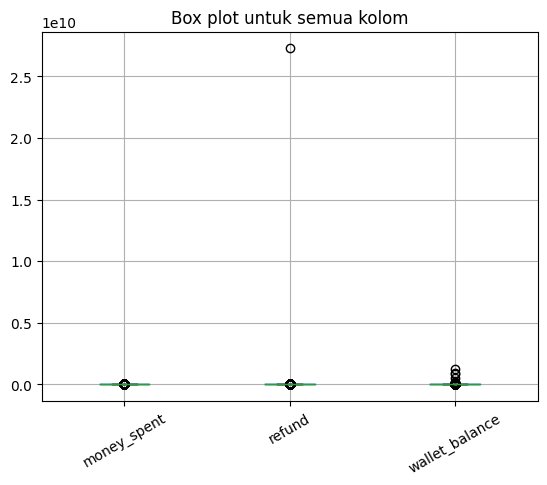

In [ ]:
#Menampilkan boxplot semua kolom user
import matplotlib.pyplot as plt

user.boxplot()
plt.title('Box plot untuk semua kolom')
plt.xticks(rotation=30)
plt.show()

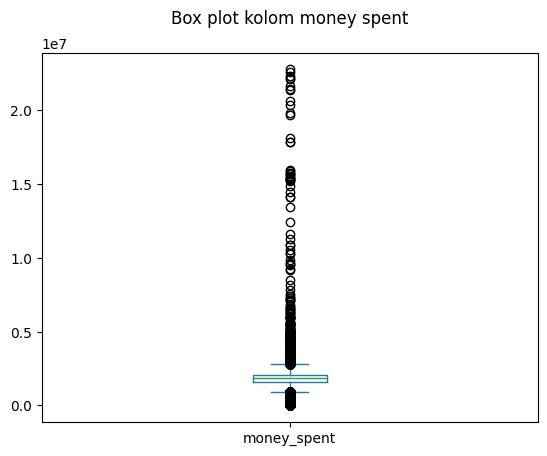

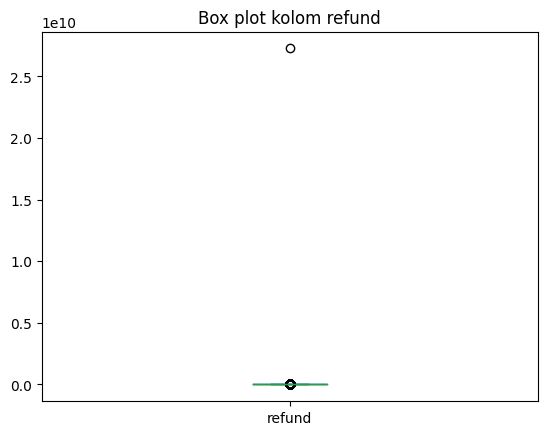

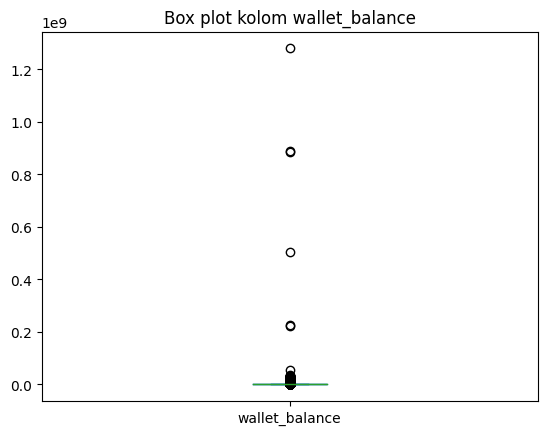

In [ ]:
#kolom boxplot
user['money_spent'].plot(kind='box')
plt.title('Box plot kolom money spent\n')
plt.show()

#kolom boxplot
user['refund'].plot(kind='box')
plt.title('Box plot kolom refund')
plt.show()

#kolom boxplot
user['wallet_balance'].plot(kind='box')
plt.title('Box plot kolom wallet_balance')
plt.show()

In [ ]:
# handling outliers user
def handle_outliers_iqr(df, column):
    Q1 = user[column].quantile(0.25)
    Q3 = user[column].quantile(0.75)
    IQR = Q3 - Q1

    # Menentukan batas bawah dan batas atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mengganti nilai outlier dengan nilai batas atas atau batas bawah terdekat
    user[column] = np.where(df[column] < lower_bound, lower_bound, user[column])
    user[column] = np.where(df[column] > upper_bound, upper_bound, user[column])

    # Konversi kolom menjadi int
    user[column] = user[column]

# Menggunakan fungsi handle_outliers_iqr untuk setiap kolom yang memiliki outlier
columns_with_outliers = ['money_spent', 'refund', 'wallet_balance']
for column in columns_with_outliers:
    handle_outliers_iqr(user, column)

# Cetak DataFrame setelah outlier ditangani
user.head()

,id,full_name,gender,money_spent,refund,wallet_balance,join_date,birth
0,SC7502062007001,PRIYANTI FIORI,perempuan,2270000.0,130000.0,480000.0,2023-11-05,1984-07-25
1,SC7502062007002,KURNIA MUHAMAD WANIMBO,laki-laki,2370000.0,140000.0,500000.0,2023-12-27,1991-02-12
2,SC7502062007003,AJENG LESTARI,perempuan,890000.0,0.0,0.0,2024-07-19,1982-06-18
3,SC7502062007004,TIA IRIANI S.E.,perempuan,890000.0,0.0,0.0,2024-05-24,1972-09-27
4,SC7502062006001,ANCE,perempuan,890000.0,0.0,0.0,2024-11-25,1992-06-11


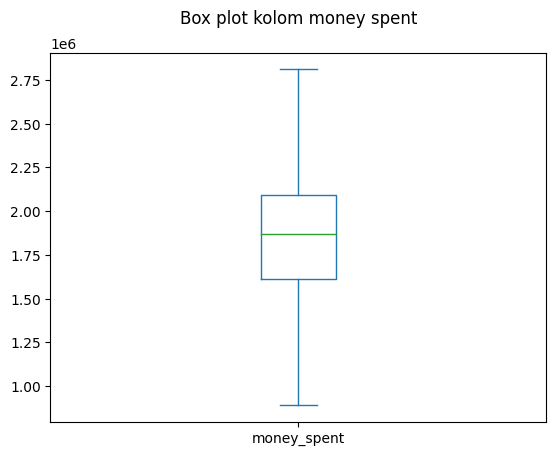

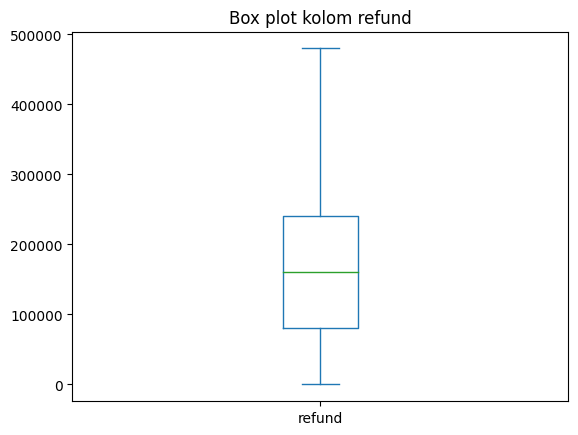

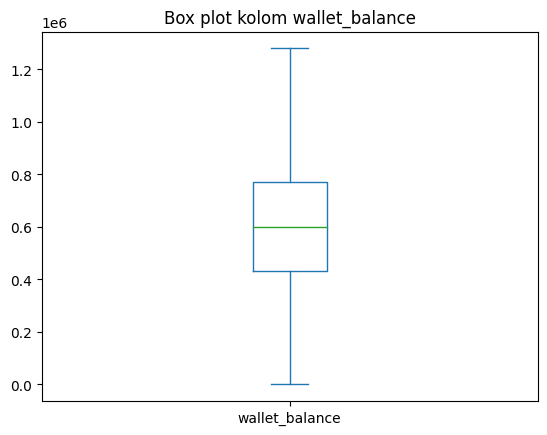

In [ ]:
#kolom boxplot
user['money_spent'].plot(kind='box')
plt.title('Box plot kolom money spent\n')
plt.show()

#kolom boxplot
user['refund'].plot(kind='box')
plt.title('Box plot kolom refund')
plt.show()

#kolom boxplot
user['wallet_balance'].plot(kind='box')
plt.title('Box plot kolom wallet_balance')
plt.show()

#### product

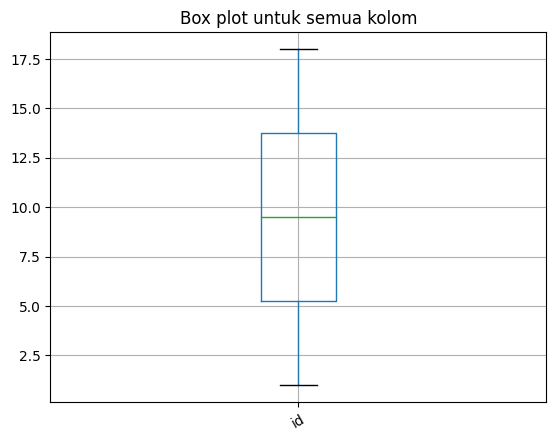

In [ ]:
#Menampilkan boxplot semua kolom product
import matplotlib.pyplot as plt

product.boxplot()
plt.title('Box plot untuk semua kolom')
plt.xticks(rotation=30)
plt.show()

#### lokasi

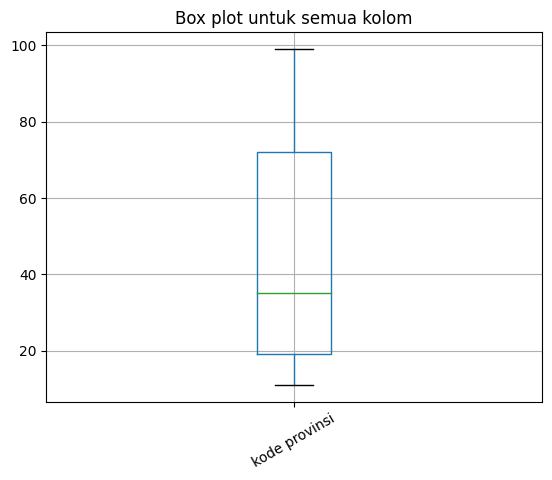

In [ ]:
#Menampilkan boxplot semua kolom lokasi
import matplotlib.pyplot as plt

lokasi.boxplot()
plt.title('Box plot untuk semua kolom')
plt.xticks(rotation=30)
plt.show()

#### team trx

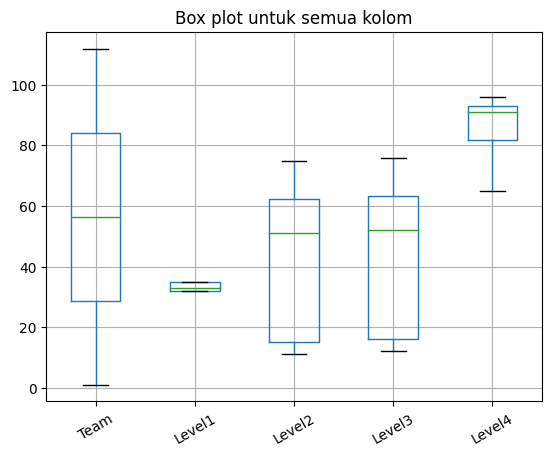

In [ ]:
#Menampilkan boxplot semua kolom team trx
import matplotlib.pyplot as plt

team_trx.boxplot()
plt.title('Box plot untuk semua kolom')
plt.xticks(rotation=30)
plt.show()

In [ ]:
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Menentukan batas bawah dan batas atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mengganti nilai outlier dengan nilai batas atas atau batas bawah terdekat
    df.loc[df[column] < lower_bound, column] = lower_bound
    df.loc[df[column] > upper_bound, column] = upper_bound

    # Konversi kolom menjadi int
    df.loc[:, column] = df[column].astype(int)

##### trx 35

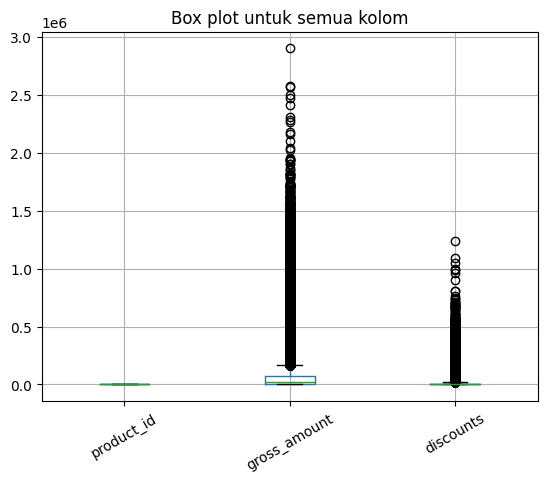

In [ ]:
trx_35.boxplot()
plt.title('Box plot untuk semua kolom')
plt.xticks(rotation=30)
plt.show()

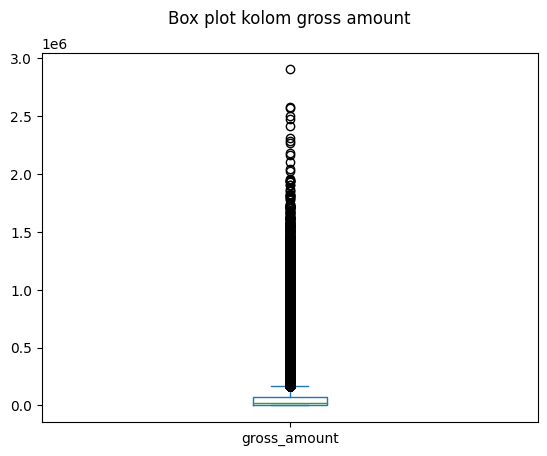

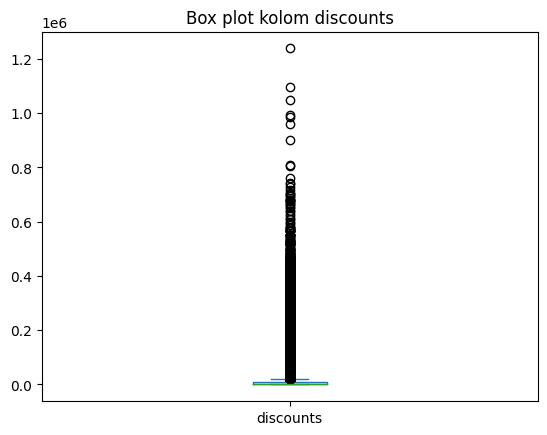

In [ ]:
#kolom boxplot
trx_35['gross_amount'].plot(kind='box')
plt.title('Box plot kolom gross amount\n')
plt.show()

#kolom boxplot
trx_35['discounts'].plot(kind='box')
plt.title('Box plot kolom discounts')
plt.show()

In [ ]:
# Menggunakan fungsi handle_outliers_iqr untuk setiap kolom yang memiliki outlier
columns_with_outliers = ['gross_amount', 'discounts']
for column in columns_with_outliers:
    handle_outliers_iqr(trx_35, column)

# Cetak DataFrame setelah outlier ditangani
trx_35.head()

,id,user_id,product_id,gross_amount,discounts,transaction_date
0,TRX443072,SC3526052001006,1,165650.0,0.0,2024-05-19
1,TRX443073,SC3526052001006,1,165650.0,0.0,2024-01-06
2,TRX443074,SC3526052001006,1,165650.0,18999.0,2024-02-03
3,TRX443075,SC3526052001006,1,165650.0,18999.0,2024-07-01
4,TRX443076,SC3526052001006,14,128500.0,0.0,2024-11-04


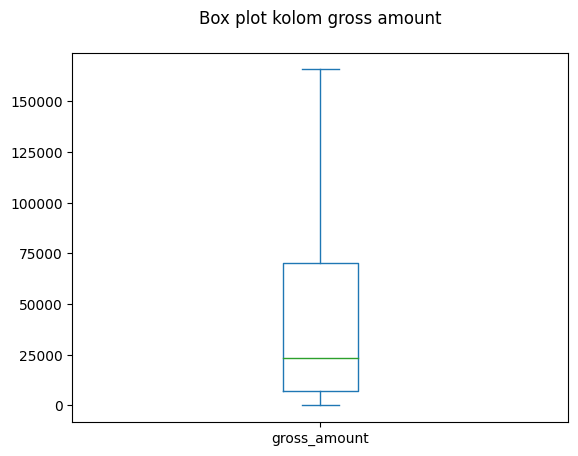

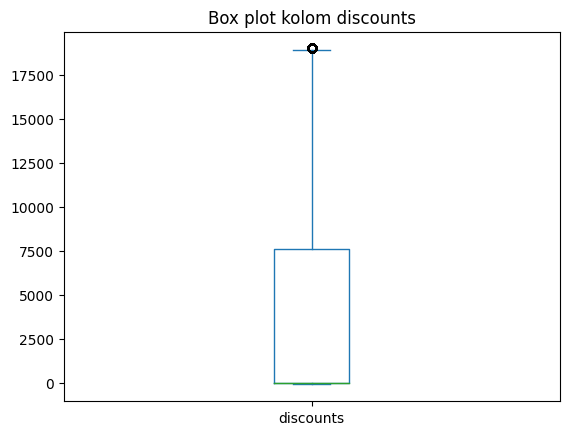

In [ ]:
#kolom boxplot
trx_35['gross_amount'].plot(kind='box')
plt.title('Box plot kolom gross amount\n')
plt.show()

#kolom boxplot
trx_35['discounts'].plot(kind='box')
plt.title('Box plot kolom discounts')
plt.show()

##### trx 18

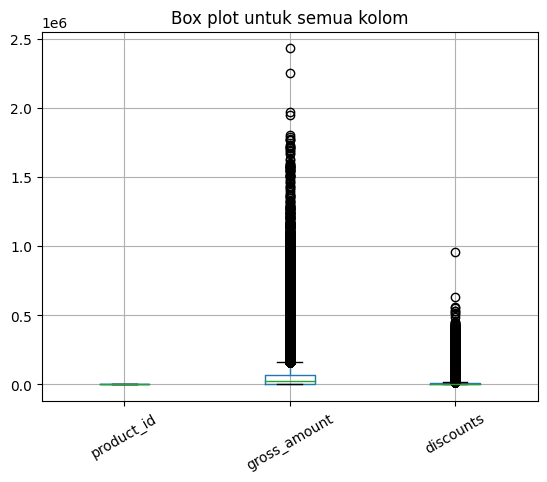

In [ ]:
trx_18.boxplot()
plt.title('Box plot untuk semua kolom')
plt.xticks(rotation=30)
plt.show()

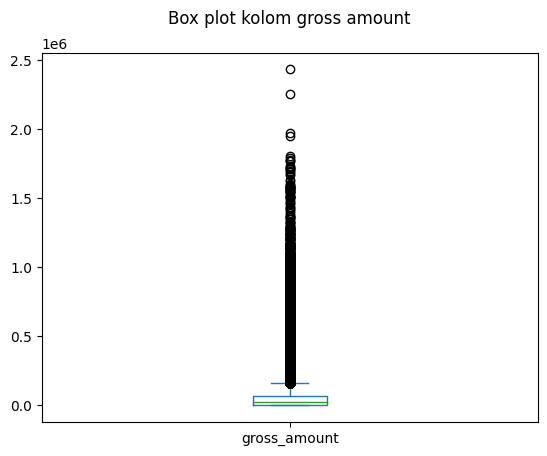

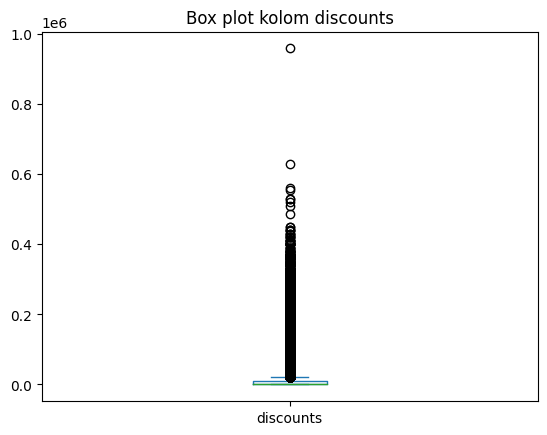

In [ ]:
#kolom boxplot
trx_18['gross_amount'].plot(kind='box')
plt.title('Box plot kolom gross amount\n')
plt.show()

#kolom boxplot
trx_18['discounts'].plot(kind='box')
plt.title('Box plot kolom discounts')
plt.show()

In [ ]:
columns_with_outliers = ['gross_amount', 'discounts']
for column in columns_with_outliers:
    handle_outliers_iqr(trx_18, column)

# Cetak DataFrame setelah outlier ditangani
trx_18.head()

,id,user_id,product_id,gross_amount,discounts,transaction_date
0,TRX616222,SC1871201004001,1,46600.0,0.0,2024-10-07
1,TRX616223,SC1871201004001,1,151000.0,0.0,2024-11-11
2,TRX616224,SC1871201004001,1,92400.0,21249.0,2024-11-01
3,TRX616225,SC1871201004001,2,159800.0,0.0,2024-10-08
4,TRX616226,SC1871201004001,2,159800.0,21249.0,2024-11-08


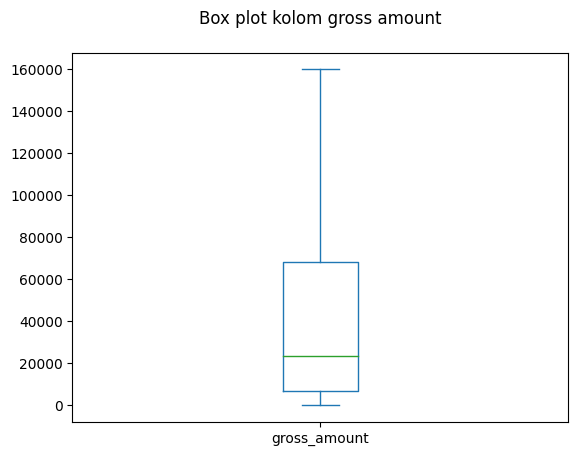

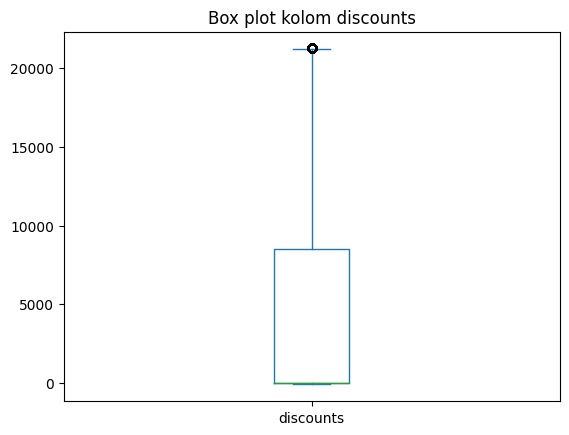

In [ ]:
#kolom boxplot
trx_18['gross_amount'].plot(kind='box')
plt.title('Box plot kolom gross amount\n')
plt.show()

#kolom boxplot
trx_18['discounts'].plot(kind='box')
plt.title('Box plot kolom discounts')
plt.show()

##### trx 19

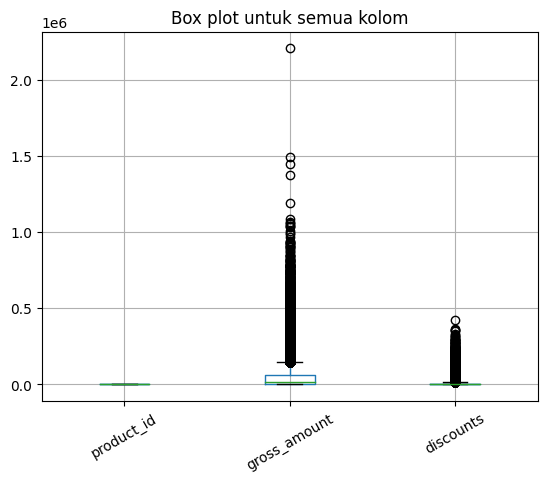

In [ ]:
trx_19.boxplot()
plt.title('Box plot untuk semua kolom')
plt.xticks(rotation=30)
plt.show()

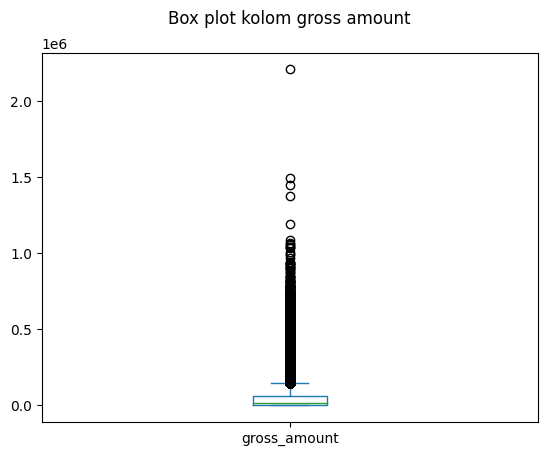

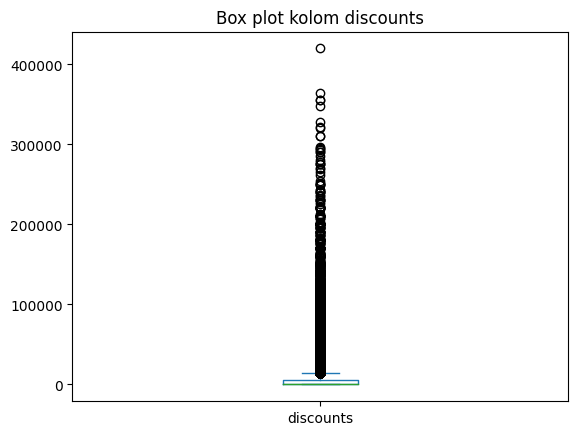

In [ ]:
#kolom boxplot
trx_19['gross_amount'].plot(kind='box')
plt.title('Box plot kolom gross amount\n')
plt.show()

#kolom boxplot
trx_19['discounts'].plot(kind='box')
plt.title('Box plot kolom discounts')
plt.show()

In [ ]:
# Menggunakan fungsi handle_outliers_iqr untuk setiap kolom yang memiliki outlier
columns_with_outliers = ['gross_amount', 'discounts']
for column in columns_with_outliers:
    handle_outliers_iqr(trx_19, column)

# Cetak DataFrame setelah outlier ditangani
trx_19.head()

,id,user_id,product_id,gross_amount,discounts,transaction_date
0,TRX240575,SC1901062001001,1,61400.0,0.0,2024-07-02
1,TRX240576,SC1901062001001,1,54000.0,0.0,2024-12-03
2,TRX240577,SC1901062001001,1,35000.0,14000.0,2024-03-05
3,TRX240578,SC1901062001001,1,59600.0,14000.0,2024-01-03
4,TRX240579,SC1901062001001,2,106800.0,0.0,2024-07-02


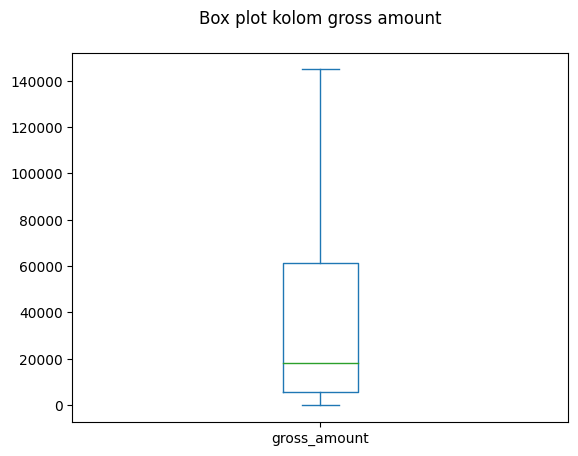

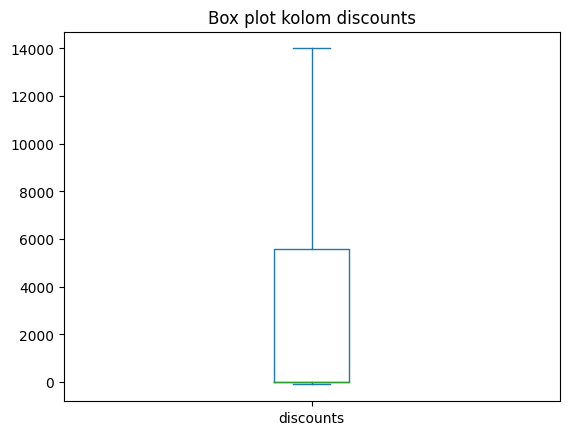

In [ ]:
#kolom boxplot
trx_19['gross_amount'].plot(kind='box')
plt.title('Box plot kolom gross amount\n')
plt.show()

#kolom boxplot
trx_19['discounts'].plot(kind='box')
plt.title('Box plot kolom discounts')
plt.show()

##### trx 65

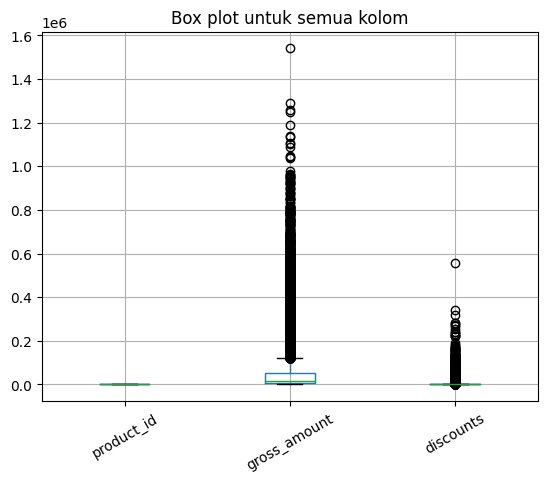

In [ ]:
trx_65.boxplot()
plt.title('Box plot untuk semua kolom')
plt.xticks(rotation=30)
plt.show()

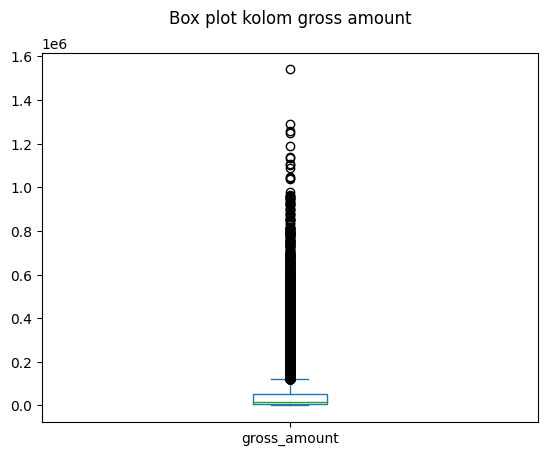

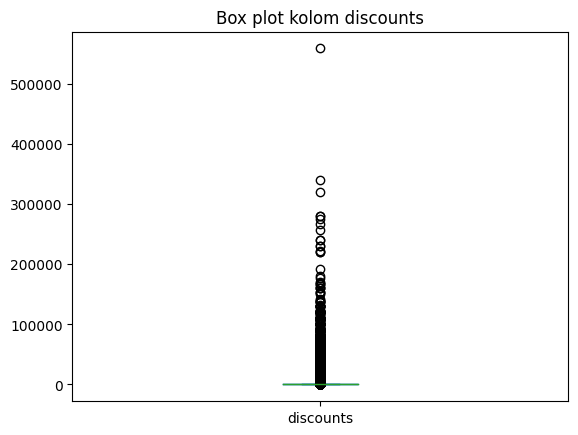

In [ ]:
#kolom boxplot
trx_65['gross_amount'].plot(kind='box')
plt.title('Box plot kolom gross amount\n')
plt.show()

#kolom boxplot
trx_65['discounts'].plot(kind='box')
plt.title('Box plot kolom discounts')
plt.show()

In [ ]:
# Menggunakan fungsi handle_outliers_iqr untuk setiap kolom yang memiliki outlier
columns_with_outliers = ['gross_amount', 'discounts']
for column in columns_with_outliers:
    handle_outliers_iqr(trx_65, column)

# Cetak DataFrame setelah outlier ditangani
trx_65.head()

,id,user_id,product_id,gross_amount,discounts,transaction_date
0,TRX413109,SC6501102001001,1,9400.0,0.0,2024-02-09
1,TRX413110,SC6501102001001,1,11399.0,0.0,2024-07-07
2,TRX413111,SC6501102001001,1,9200.0,0.0,2024-06-12
3,TRX413112,SC6501102001001,2,108600.0,0.0,2024-01-06
4,TRX413113,SC6501102001001,2,122100.0,0.0,2024-02-15


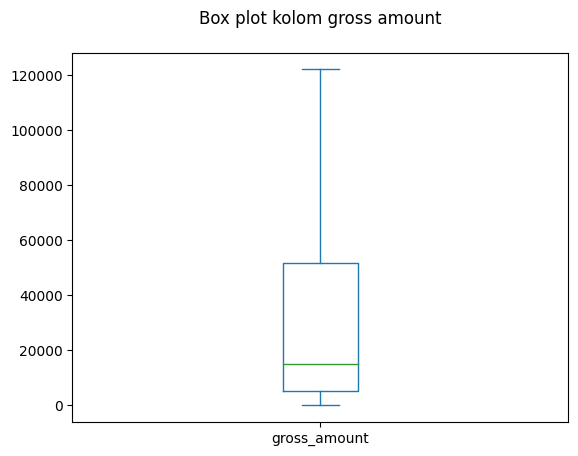

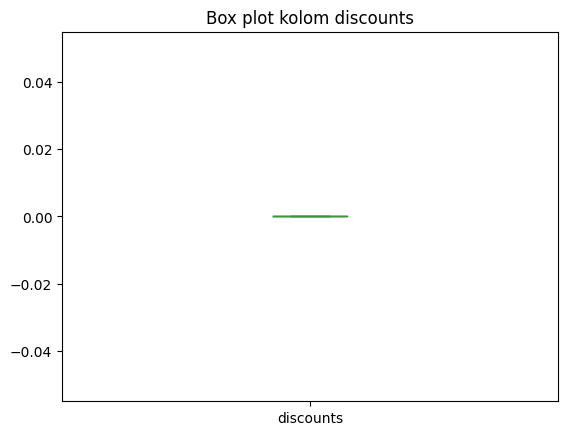

In [ ]:
#kolom boxplot
trx_65['gross_amount'].plot(kind='box')
plt.title('Box plot kolom gross amount\n')
plt.show()

#kolom boxplot
trx_65['discounts'].plot(kind='box')
plt.title('Box plot kolom discounts')
plt.show()

##### Hasil trx

In [ ]:
jumlah_baris35 = trx_35.shape[0]
jumlah_baris18 = trx_18.shape[0]
jumlah_baris19 = trx_19.shape[0]
jumlah_baris65 = trx_65.shape[0]

print("Jumlah baris dalam dataset:", jumlah_baris35)
print("Jumlah baris dalam dataset:", jumlah_baris18)
print("Jumlah baris dalam dataset:", jumlah_baris19)
print("Jumlah baris dalam dataset:", jumlah_baris65)

Jumlah baris dalam dataset: 2247720
Jumlah baris dalam dataset: 567134
Jumlah baris dalam dataset: 82136
Jumlah baris dalam dataset: 38572


## Join Tabel

gabung tabel user dan trx dengan product

In [ ]:
dataframes = [trx_35, trx_18, trx_19, trx_65]

gabung_trx = pd.concat(dataframes, ignore_index=True)

# Tampilkan lima baris pertama dari hasil gabungan
gabung_trx

,id,user_id,product_id,gross_amount,discounts,transaction_date
0,TRX443072,SC3526052001006,1,165650.0,0.0,2024-05-19
1,TRX443073,SC3526052001006,1,165650.0,0.0,2024-01-06
2,TRX443074,SC3526052001006,1,165650.0,18999.0,2024-02-03
3,TRX443075,SC3526052001006,1,165650.0,18999.0,2024-07-01
4,TRX443076,SC3526052001006,14,128500.0,0.0,2024-11-04
...,...,...,...,...,...,...
2935557,TRX451856,SC6504032002002,15,4300.0,0.0,2024-05-16
2935558,TRX451857,SC6504032002002,15,1800.0,0.0,2024-05-28
2935559,TRX451858,SC6504032002002,15,3900.0,0.0,2024-05-23
2935560,TRX451859,SC6504032002002,17,120300.0,0.0,2024-09-08


In [ ]:
# gabung_trx.to_csv('/content/drive/My Drive/data_trx.csv', index=False)

In [ ]:
# menggabungkan user dan trx
data = pd.merge(user, gabung_trx, left_on='id', right_on='user_id')
data.head()

,id_x,full_name,gender,money_spent,refund,wallet_balance,join_date,birth,id_y,user_id,product_id,gross_amount,discounts,transaction_date
0,SC6501102001001,EDI SYAHID MESAK,laki-laki,2160000.0,100000.0,590000.0,2023-12-25,1997-09-01,TRX413109,SC6501102001001,1,9400.0,0.0,2024-02-09
1,SC6501102001001,EDI SYAHID MESAK,laki-laki,2160000.0,100000.0,590000.0,2023-12-25,1997-09-01,TRX413110,SC6501102001001,1,11399.0,0.0,2024-07-07
2,SC6501102001001,EDI SYAHID MESAK,laki-laki,2160000.0,100000.0,590000.0,2023-12-25,1997-09-01,TRX413111,SC6501102001001,1,9200.0,0.0,2024-06-12
3,SC6501102001001,EDI SYAHID MESAK,laki-laki,2160000.0,100000.0,590000.0,2023-12-25,1997-09-01,TRX413112,SC6501102001001,2,108600.0,0.0,2024-01-06
4,SC6501102001001,EDI SYAHID MESAK,laki-laki,2160000.0,100000.0,590000.0,2023-12-25,1997-09-01,TRX413113,SC6501102001001,2,122100.0,0.0,2024-02-15


In [ ]:
# join hasil user dan trx dengan product
data_trx = pd.merge(data, product, left_on='product_id', right_on='id')
data_trx.head()

,id_x,full_name,gender,money_spent,refund,wallet_balance,join_date,birth,id_y,user_id,product_id,gross_amount,discounts,transaction_date,id,product name
0,SC6501102001001,EDI SYAHID MESAK,laki-laki,2160000.0,100000.0,590000.0,2023-12-25,1997-09-01,TRX413109,SC6501102001001,1,9400.0,0.0,2024-02-09,1,Man Fashion
1,SC6501102001001,EDI SYAHID MESAK,laki-laki,2160000.0,100000.0,590000.0,2023-12-25,1997-09-01,TRX413110,SC6501102001001,1,11399.0,0.0,2024-07-07,1,Man Fashion
2,SC6501102001001,EDI SYAHID MESAK,laki-laki,2160000.0,100000.0,590000.0,2023-12-25,1997-09-01,TRX413111,SC6501102001001,1,9200.0,0.0,2024-06-12,1,Man Fashion
3,SC6501102001006,DWI A.,laki-laki,1890000.0,190000.0,860000.0,2023-10-15,1993-08-11,TRX413246,SC6501102001006,1,20800.0,0.0,2024-11-15,1,Man Fashion
4,SC6501102001006,DWI A.,laki-laki,1890000.0,190000.0,860000.0,2023-10-15,1993-08-11,TRX413247,SC6501102001006,1,19200.0,0.0,2024-03-06,1,Man Fashion


gabung hasilnya dengan lokasi

In [ ]:
# Menggabungkan dua tabel user dan lokasi
data = pd.merge(data_trx, lokasi, left_on=data_trx['id_x'].astype(str).str[2:8], right_on=lokasi['kode kecamatan'].astype(str))

# Menampilkan lima baris pertama dari hasil gabungan
data.head()

,key_0,id_x,full_name,gender,money_spent,refund,wallet_balance,join_date,birth,id_y,...,discounts,transaction_date,id,product name,nama provinsi,kode provinsi,nama kabupaten,kode kabupaten,nama kecamatan,kode kecamatan
0,650110,SC6501102001001,EDI SYAHID MESAK,laki-laki,2160000.0,100000.0,590000.0,2023-12-25,1997-09-01,TRX413109,...,0.0,2024-02-09,1,Man Fashion,KALIMANTAN UTARA,65,BULUNGAN,6501,BUNYU,650110
1,650110,SC6501102001001,EDI SYAHID MESAK,laki-laki,2160000.0,100000.0,590000.0,2023-12-25,1997-09-01,TRX413110,...,0.0,2024-07-07,1,Man Fashion,KALIMANTAN UTARA,65,BULUNGAN,6501,BUNYU,650110
2,650110,SC6501102001001,EDI SYAHID MESAK,laki-laki,2160000.0,100000.0,590000.0,2023-12-25,1997-09-01,TRX413111,...,0.0,2024-06-12,1,Man Fashion,KALIMANTAN UTARA,65,BULUNGAN,6501,BUNYU,650110
3,650110,SC6501102001006,DWI A.,laki-laki,1890000.0,190000.0,860000.0,2023-10-15,1993-08-11,TRX413246,...,0.0,2024-11-15,1,Man Fashion,KALIMANTAN UTARA,65,BULUNGAN,6501,BUNYU,650110
4,650110,SC6501102001006,DWI A.,laki-laki,1890000.0,190000.0,860000.0,2023-10-15,1993-08-11,TRX413247,...,0.0,2024-03-06,1,Man Fashion,KALIMANTAN UTARA,65,BULUNGAN,6501,BUNYU,650110


In [ ]:
# hasil akhir penggabungan data disimpan dalam format csv.
data.to_csv('/content/drive/My Drive/data.csv', index=False)

## Exploratory Data Analysis (EDA)

###Mengelaborasi features dan tipe data (nominal, ordinal, numerical)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2909390 entries, 0 to 2909389
Data columns (total 23 columns):
 #   Column            Dtype  
---  ------            -----  
 0   key_0             object 
 1   id_x              object 
 2   full_name         object 
 3   gender            object 
 4   money_spent       float64
 5   refund            float64
 6   wallet_balance    float64
 7   join_date         object 
 8   birth             object 
 9   id_y              object 
 10  user_id           object 
 11  product_id        int64  
 12  gross_amount      float64
 13  discounts         float64
 14  transaction_date  object 
 15  id                int64  
 16  product name      object 
 17  nama provinsi     object 
 18  kode provinsi     int64  
 19  nama kabupaten    object 
 20  kode kabupaten    object 
 21  nama kecamatan    object 
 22  kode kecamatan    object 
dtypes: float64(5), int64(3), object(15)
memory usage: 510.5+ MB


Pengelompokan dataset berdasarkan jenis datanya. numericals untuk int, nominal untuk data tanpa adanya urutan tertentu seperti id, ordinal untuk data date atau untuk memahami urutan waktu dari peristiwa, categoricals untuk data string.

In [ ]:
nominal = ['key_0', 'id_x', 'id_y', 'user_id', 'kode kabupaten', 'kode kecamatan']
ordinal = ['join_date', 'birth', 'transaction_date']
categoricals = ['full_name', 'gender', 'product name',	'nama provinsi', 'nama kabupaten', 'nama kecamatan']
numericals = ['money_spent', 'refund', 'wallet_balance', 'product_id', 'gross_amount', 'discounts', 'id', 'kode provinsi']

###Menemukan dan mendeskripsikan statistical five summaries
Fungsi Describe() digunakan untuk menampilkan deskriptif statistik data. Hanya kolom yang bertipe numerik(int) yang akan ditampilkan statistiknya.
1. Kolom product_id, id kode provinsi merupakan nilai unik dari setiap baris.
2. Secara keseluruhan, nilai minimum dan maksimum masuk akal untuk setiap kolom.
3. Kolom money_spent,wallet_balance memiliki distribusi simetris antara mean dan median 50%.

In [ ]:
data.describe()

,money_spent,refund,wallet_balance,product_id,gross_amount,discounts,id,kode provinsi
count,2.909390e+06,2.909390e+06,2.909390e+06,2.909390e+06,2.909390e+06,2.909390e+06,2.909390e+06,2.909390e+06
mean,1.922445e+06,2.203683e+05,6.663761e+05,8.207237e+00,4.653647e+04,4.382999e+03,8.207237e+00,3.167010e+01
std,3.027899e+05,1.273893e+05,2.301883e+05,5.484455e+00,5.213102e+04,7.397919e+03,5.484455e+00,7.958254e+00
min,8.900000e+05,0.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+02,-1.000000e+02,1.000000e+00,1.800000e+01
25%,1.750000e+06,1.300000e+05,5.200000e+05,3.000000e+00,6.800000e+03,0.000000e+00,3.000000e+00,3.500000e+01
50%,1.950000e+06,2.100000e+05,6.700000e+05,7.000000e+00,2.310000e+04,0.000000e+00,7.000000e+00,3.500000e+01
75%,2.120000e+06,3.000000e+05,8.100000e+05,1.400000e+01,6.950000e+04,7.300000e+03,1.400000e+01,3.500000e+01
max,2.810000e+06,4.800000e+05,1.280000e+06,1.800000e+01,1.656500e+05,2.124900e+04,1.800000e+01,6.500000e+01


###Mendeskripsikan distribusi data

1. Kolom money_spent merupakan distribusi Normal.
2. Kolom refund	merupakan distribusi bimodal yang memiliki 2 puncak.
3. Kolom wallet_balance	merupakan distribusi Normal.
4. Kolom gross_amount dan discounts	merupakan distribusi skewed right (miring ke kanan)


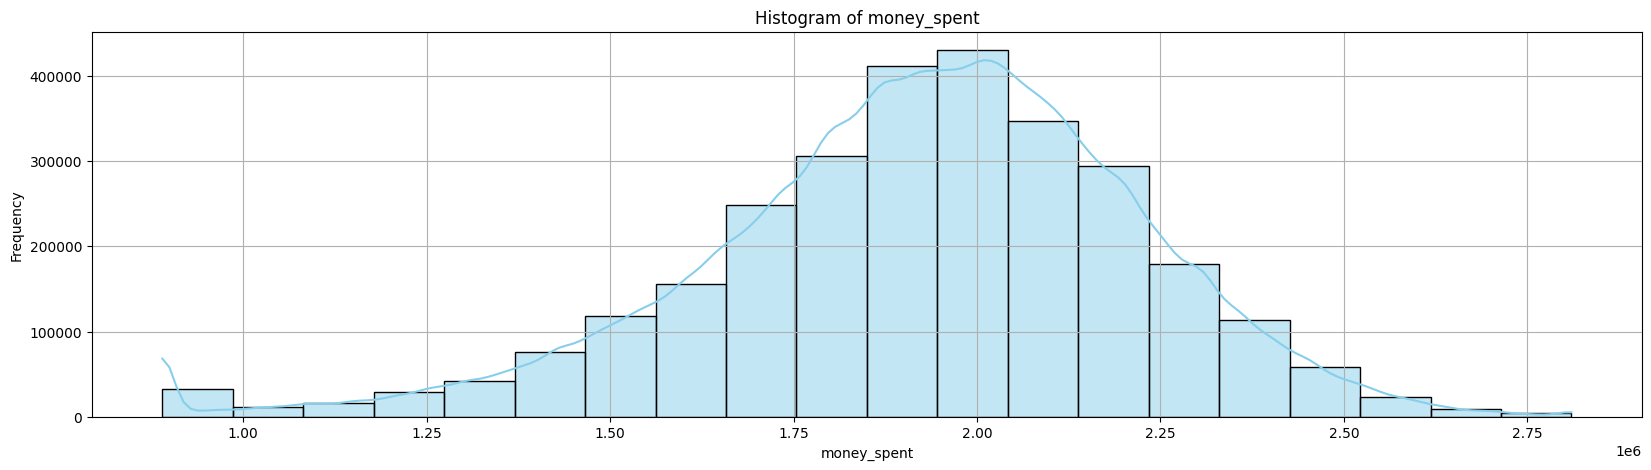

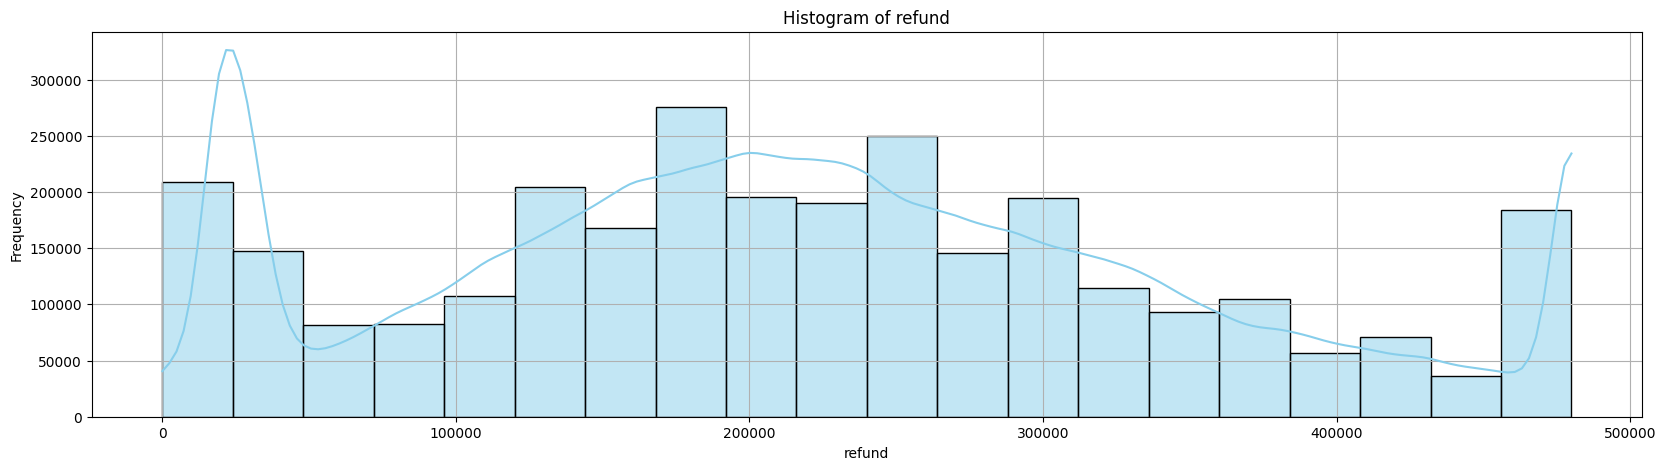

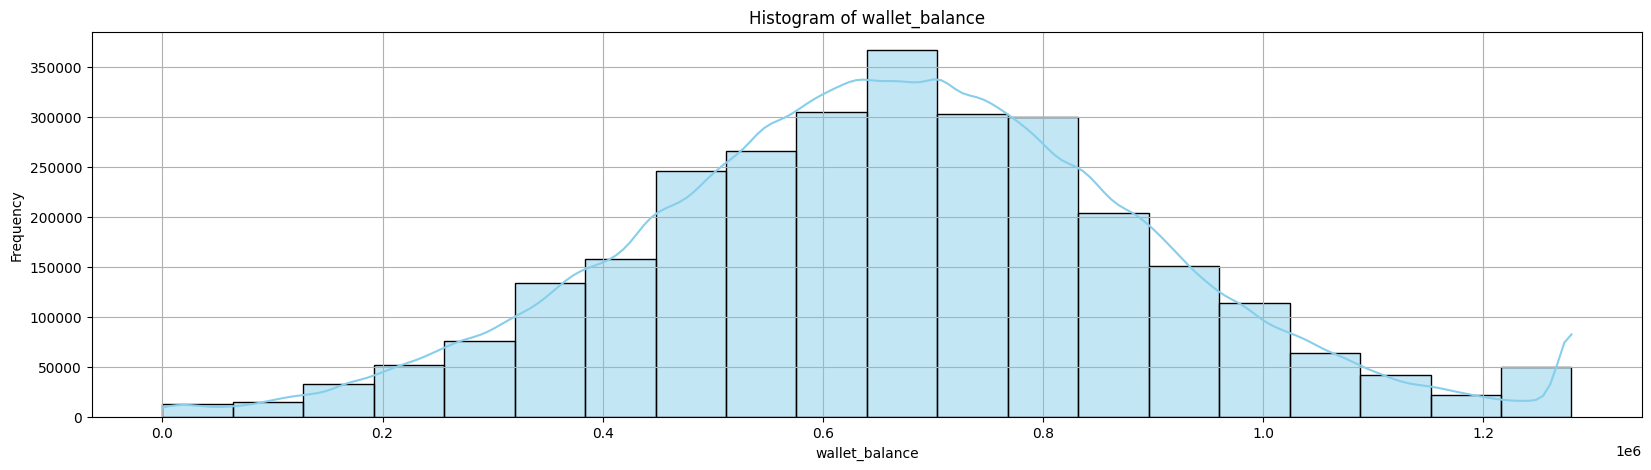

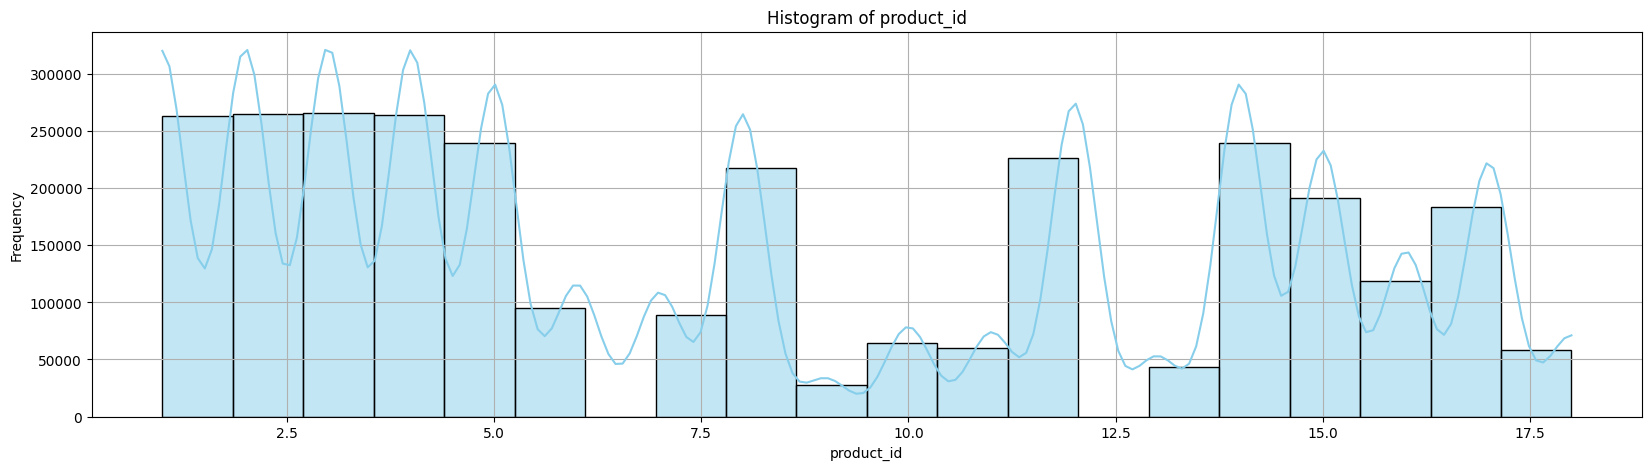

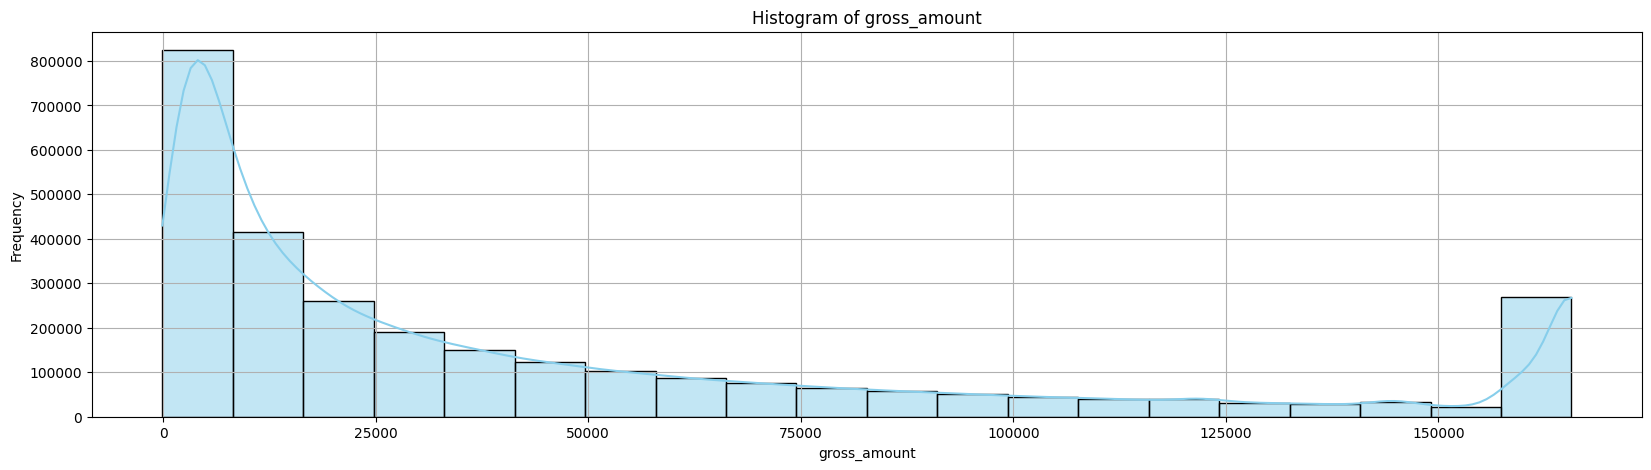

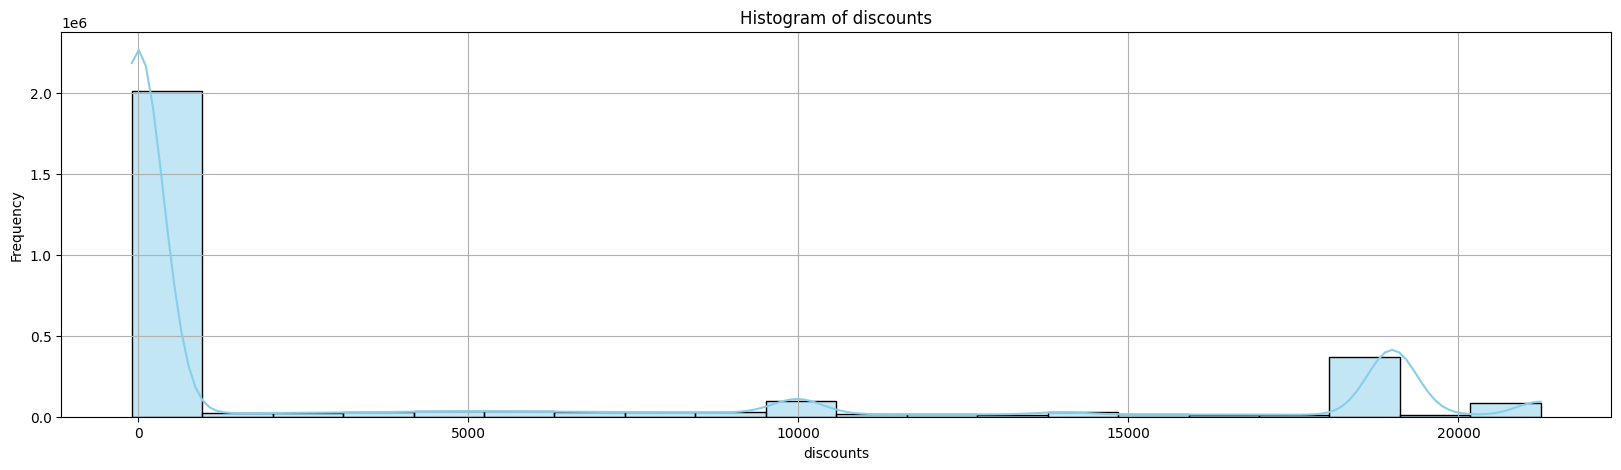

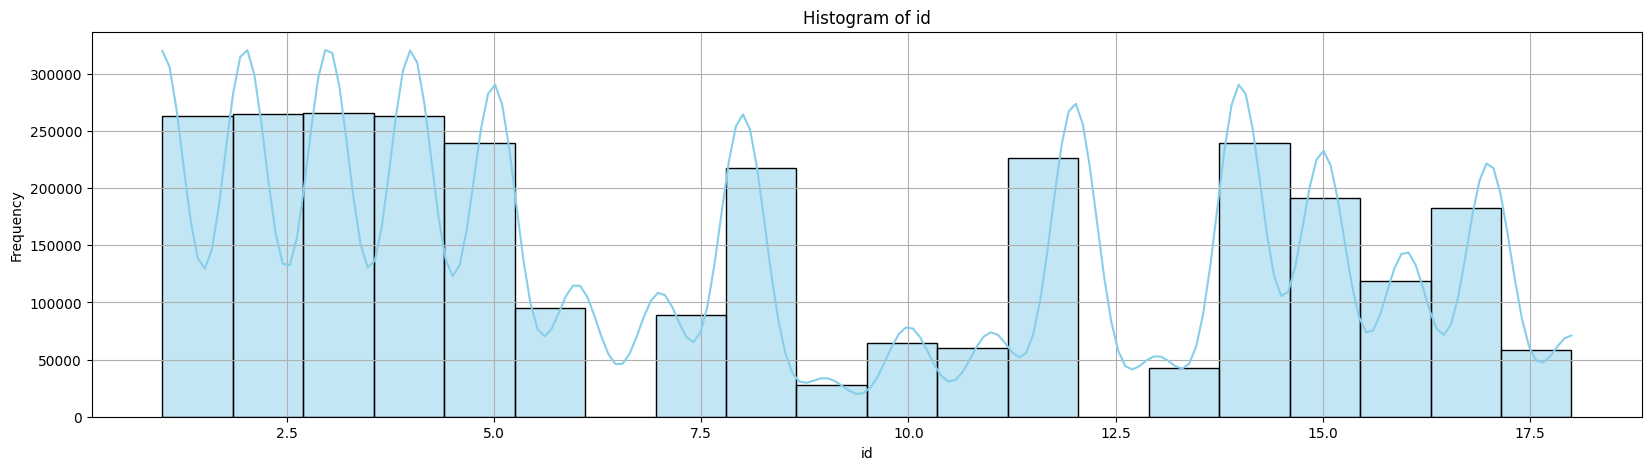

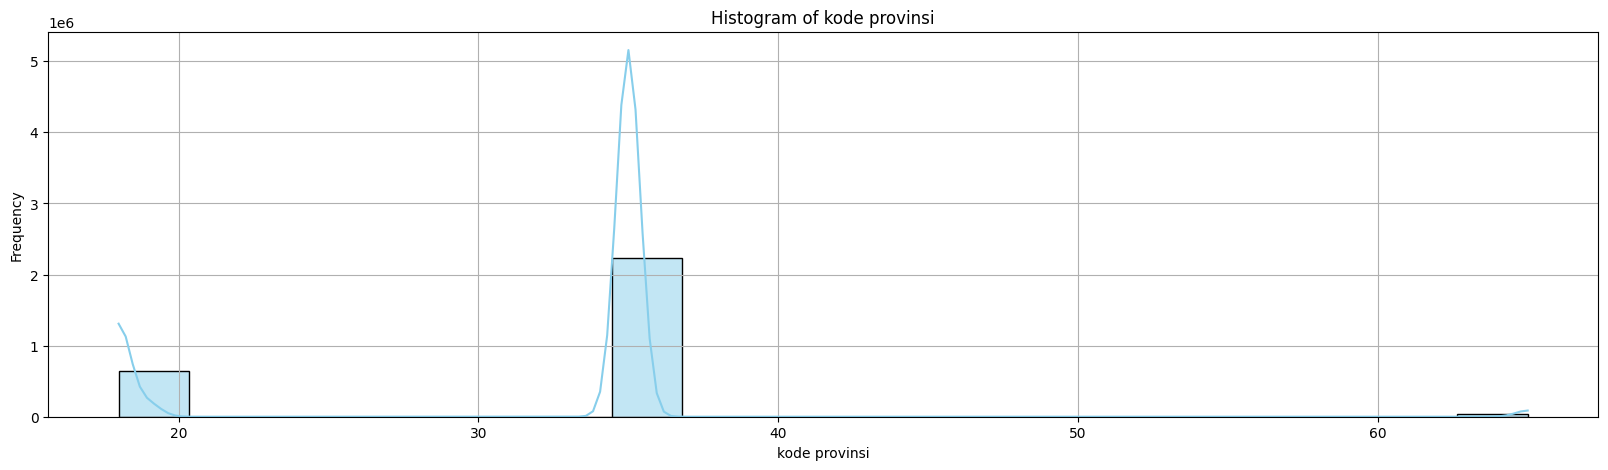

In [ ]:
# Mendeskripsikan distribusi data
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats


for kolom in numericals:
    # distribusi data menggunakan histogram
    plt.figure(figsize=(20, 5))
    sns.histplot(data[kolom], bins=20, kde=True, color='skyblue')
    plt.title(f'Histogram of {kolom}')
    plt.xlabel(kolom)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

## Feature Engineering

### GROUPING BERDASARKAN USER_ID

In [ ]:
# Menghitung jumlah transaksi untuk setiap user
transaksi_per_user = data.groupby(['user_id']).size().reset_index(name='jumlah_transaksi')

# Menampilkan 5 baris pertama dari hasil perhitungan
transaksi_per_user.head()

,user_id,jumlah_transaksi
0,SC1801042001002,31
1,SC1801042001006,34
2,SC1801042002004,30
3,SC1801042002007,29
4,SC1801042002008,28


In [ ]:
# Mengubah product_id menjadi "jumlah variasi produk yang dibeli" berarti kita menghitung berapa banyak jenis produk berbeda yang telah dibeli oleh setiap pengguna.

# Menghitung jumlah variasi produk yang dibeli oleh setiap user_id
product_count = data.groupby('user_id')['product_id'].nunique().reset_index().rename(columns={'product_id': 'product_variety'})
product_count.head()

,user_id,product_variety
0,SC1801042001002,11
1,SC1801042001006,12
2,SC1801042002004,12
3,SC1801042002007,11
4,SC1801042002008,10


In [ ]:
# Melihat produk list pada product variety
# Mengelompokkan data berdasarkan customer_id dan product_name
grouped = data.groupby(['user_id', 'product name']).size().reset_index(name='count')

# Menghitung jumlah variasi produk yang dibeli oleh setiap pelanggan
product_variation = grouped.groupby('user_id').agg(
    num_variations=('product name', 'count'),
    product_list=('product name', lambda x: list(x))
).reset_index()

# Menampilkan hasil
pd.set_option('display.max_colwidth', None)
product_variation.head()

,user_id,num_variations,product_list
0,SC1801042001002,11,"[Elektronik, Food & Drink, Hotel, Investasi, Keperluan Rumah Tangga, Kesehatan, Man Fashion, Otomotif, Ride Hailing, Sewa Motor/Mobil, Woman Fashion]"
1,SC1801042001006,12,"[Elektronik, Food & Drink, Hotel, Investasi, Keperluan Anak, Keperluan Rumah Tangga, Kesehatan, Man Fashion, Otomotif, Ride Hailing, Travel, Woman Fashion]"
2,SC1801042002004,12,"[Elektronik, Food & Drink, Hotel, Investasi, Keperluan Rumah Tangga, Kesehatan, Man Fashion, Otomotif, Ride Hailing, Sewa Motor/Mobil, Travel, Woman Fashion]"
3,SC1801042002007,11,"[Elektronik, Food & Drink, Hotel, Investasi, Keperluan Rumah Tangga, Kesehatan, Man Fashion, Otomotif, Pulsa, Ride Hailing, Woman Fashion]"
4,SC1801042002008,10,"[Elektronik, Food & Drink, Investasi, Keperluan Rumah Tangga, Kesehatan, Man Fashion, Otomotif, Ride Hailing, Travel, Woman Fashion]"


In [ ]:
# transaction_date (diubah menjadi fitur seperti frekuensi transaksi atau distribusi waktu) untuk dapat memberikan informasi tentang frekuensi pembelian pengguna

# Mengubah transaction_date menjadi datetime
data['transaction_date'] = pd.to_datetime(data['transaction_date'])

# Menghitung frekuensi transaksi (jumlah hari transaksi unik)
transaction_days = data.groupby('user_id')['transaction_date'].nunique().reset_index().rename(columns={'transaction_date': 'transaction_days'})
transaction_days.head()

,user_id,transaction_days
0,SC1801042001002,31
1,SC1801042001006,34
2,SC1801042002004,27
3,SC1801042002007,29
4,SC1801042002008,26


In [ ]:
# Mengelompokkan data berdasarkan user_id dan menghitung agregat
grouped_data = data.groupby('user_id').agg({
    'gender': 'first',  # Mengambil gender pertama yang muncul untuk setiap user_id
    'money_spent': 'sum',
    'refund': 'sum',
    'wallet_balance': 'mean',
    'gross_amount': 'sum',
    'discounts': 'sum',
    'kode provinsi': 'first',
    'nama provinsi': 'first',
    'kode kabupaten': 'first',
    'nama kabupaten': 'first',
    'kode kecamatan': 'first',
    'nama kecamatan': 'first'
}).reset_index()

# Menggabungkan jumlah transaksi, jumlah variasi produk dan frekuensi transaksi ke dalam grouped_data
grouped_data = grouped_data.merge(transaksi_per_user, on=['user_id'], how='left')
grouped_data = grouped_data.merge(product_count, on='user_id', how='left')
grouped_data = grouped_data.merge(transaction_days, on='user_id', how='left')

# Menampilkan beberapa baris pertama dari hasil pengelompokan
grouped_data.head()

,user_id,gender,money_spent,refund,wallet_balance,gross_amount,discounts,kode provinsi,nama provinsi,kode kabupaten,nama kabupaten,kode kecamatan,nama kecamatan,jumlah_transaksi,product_variety,transaction_days
0,SC1801042001002,perempuan,39370000.0,1860000.0,60000.0,1239700.0,105697.0,18,LAMPUNG,1801,LAMPUNG SELATAN,180104,NATAR,31,11,31
1,SC1801042001006,perempuan,52360000.0,5780000.0,760000.0,1413998.0,195694.0,18,LAMPUNG,1801,LAMPUNG SELATAN,180104,NATAR,34,12,34
2,SC1801042002004,laki-laki,57000000.0,5100000.0,900000.0,1516300.0,153296.0,18,LAMPUNG,1801,LAMPUNG SELATAN,180104,NATAR,30,12,27
3,SC1801042002007,laki-laki,58290000.0,8990000.0,690000.0,1720898.0,166393.0,18,LAMPUNG,1801,LAMPUNG SELATAN,180104,NATAR,29,11,29
4,SC1801042002008,perempuan,58240000.0,6720000.0,680000.0,1711700.0,177145.0,18,LAMPUNG,1801,LAMPUNG SELATAN,180104,NATAR,28,10,26


In [ ]:
selected_columns = grouped_data[['user_id', 'jumlah_transaksi', 'product_variety', 'transaction_days']]
selected_columns.head()

,user_id,jumlah_transaksi,product_variety,transaction_days
0,SC1801042001002,31,11,31
1,SC1801042001006,34,12,34
2,SC1801042002004,30,12,27
3,SC1801042002007,29,11,29
4,SC1801042002008,28,10,26


### Scaling Fitur

In [ ]:
# Scaling fitur
from sklearn.preprocessing import StandardScaler

fitur = selected_columns[['jumlah_transaksi', 'product_variety']]

# Standarisasi fitur
scaler = StandardScaler()

# fit_transform
fitur_scaled = scaler.fit_transform(fitur)
fitur_scaled.shape

(90270, 3)

In [ ]:
fitur_scaled = pd.DataFrame(fitur_scaled)
fitur_scaled.columns = ['jumlah_transaksi', 'product_variety']
fitur_scaled.head()

,jumlah_transaksi,product_variety,transaction_days
0,-0.173873,0.108872,0.033320
1,0.250254,0.566176,0.487445
2,-0.315249,0.566176,-0.572179
3,-0.456625,0.108872,-0.269430
4,-0.598000,-0.348431,-0.723554


**fitur_scaled yang nantinya dipake buat model**

# MODELING

## K-Means

**K-Means** adalah algoritma clustering yang membagi data ke dalam
𝑘 kelompok (clusters) berdasarkan jarak terdekat antara data dengan pusat cluster (centroid).

**Kelebihan:**

* Mudah diimplementasikan dan cepat konvergen.
* Efektif untuk dataset berukuran besar.

**Kekurangan:**

* Harus menentukan jumlah cluster
𝑘 sebelumnya.
* Sensitif terhadap inisialisasi centroid.
* Tidak efektif untuk bentuk cluster non-bulat atau distribusi data dengan densitas yang bervariasi.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data_grouped.csv')
df.head(5)

,user_id,gender,money_spent,refund,wallet_balance,gross_amount,discounts,kode provinsi,nama provinsi,kode kabupaten,nama kabupaten,kode kecamatan,nama kecamatan,jumlah_transaksi,product_variety,transaction_days
0,SC1801042001002,perempuan,39370000.0,1860000.0,60000.0,1239700.0,105697.0,18,LAMPUNG,1801,LAMPUNG SELATAN,180104,NATAR,31,11,31
1,SC1801042001006,perempuan,52360000.0,5780000.0,760000.0,1413998.0,195694.0,18,LAMPUNG,1801,LAMPUNG SELATAN,180104,NATAR,34,12,34
2,SC1801042002004,laki-laki,57000000.0,5100000.0,900000.0,1516300.0,153296.0,18,LAMPUNG,1801,LAMPUNG SELATAN,180104,NATAR,30,12,27
3,SC1801042002007,laki-laki,58290000.0,8990000.0,690000.0,1720898.0,166393.0,18,LAMPUNG,1801,LAMPUNG SELATAN,180104,NATAR,29,11,29
4,SC1801042002008,perempuan,58240000.0,6720000.0,680000.0,1711700.0,177145.0,18,LAMPUNG,1801,LAMPUNG SELATAN,180104,NATAR,28,10,26


### Cluster 3

In [ ]:
sample_df = df.sample(n=1000, random_state=42)
# Memilih fitur yang relevan dari sampel
features = sample_df[['jumlah_transaksi', 'product_variety']]

# Normalisasi data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [ ]:
# Menentukan jumlah cluster
num_clusters = 3

# Membuat model K-means
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10, max_iter=300, init='k-means++', tol=1e-4)

# Fit model ke data
kmeans.fit(features_scaled)

# Mendapatkan label cluster untuk setiap data point
labels = kmeans.labels_

# Menambahkan label cluster ke DataFrame sampel
sample_df['cluster'] = labels

In [ ]:
# Menghitung Silhouette Score
sil_score3 = silhouette_score(features_scaled, labels)
print(f'Silhouette Score: {sil_score3}')

Silhouette Score: 0.4519503852539241


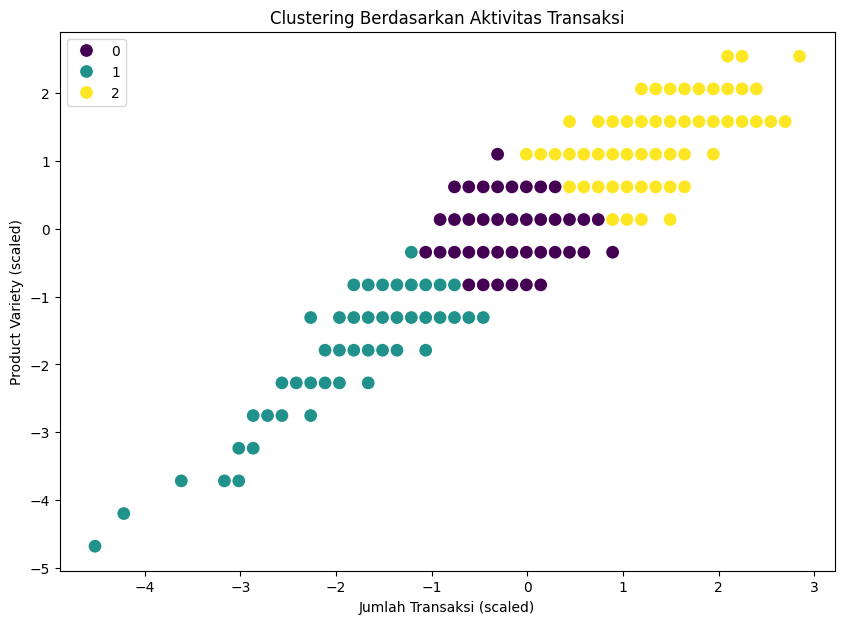

In [ ]:
# Memvisualisasikan cluster
plt.figure(figsize=(10, 7))
sns.scatterplot(x=features_scaled[:, 0], y=features_scaled[:, 1], hue=labels, palette='viridis', s=100)
plt.title('Clustering Berdasarkan Aktivitas Transaksi')
plt.xlabel('Jumlah Transaksi (scaled)')
plt.ylabel('Product Variety (scaled)')
plt.show()

### Cluster 4

In [ ]:
sample_df = df.sample(n=1000, random_state=42)
# Memilih fitur yang relevan dari sampel
features = sample_df[['jumlah_transaksi', 'product_variety']]

# Normalisasi data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [ ]:
# Menentukan jumlah cluster
num_clusters = 4

# Membuat model K-means
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10, max_iter=300, init='k-means++')

# Fit model ke data
kmeans.fit(features_scaled)

# Mendapatkan label cluster untuk setiap data point
labels = kmeans.labels_

# Menambahkan label cluster ke DataFrame sampel
sample_df['cluster'] = labels

In [ ]:
# Menghitung Silhouette Score
sil_score4 = silhouette_score(features_scaled, labels)
print(f'Silhouette Score: {sil_score4}')

Silhouette Score: 0.44745110560362616


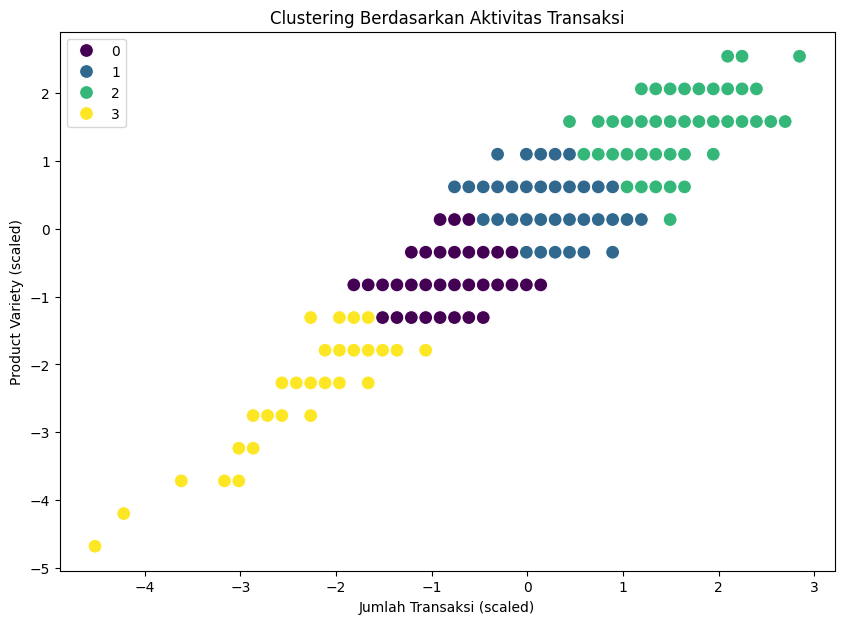

In [ ]:
# Memvisualisasikan cluster
plt.figure(figsize=(10, 7))
sns.scatterplot(x=features_scaled[:, 0], y=features_scaled[:, 1], hue=labels, palette='viridis', s=100)
plt.title('Clustering Berdasarkan Aktivitas Transaksi')
plt.xlabel('Jumlah Transaksi (scaled)')
plt.ylabel('Product Variety (scaled)')
plt.show()

### Cluster 5

In [ ]:
sample_df = df.sample(n=1000, random_state=42)
# Memilih fitur yang relevan dari sampel
features = sample_df[['jumlah_transaksi', 'product_variety']]

# Normalisasi data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [ ]:
# Menentukan jumlah cluster
num_clusters = 5

# Membuat model K-means
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10, max_iter=300, init='k-means++')

# Fit model ke data
kmeans.fit(features_scaled)

# Mendapatkan label cluster untuk setiap data point
labels = kmeans.labels_

# Menambahkan label cluster ke DataFrame sampel
sample_df['cluster'] = labels

In [ ]:
# Menghitung Silhouette Score
sil_score5 = silhouette_score(features_scaled, labels)
print(f'Silhouette Score: {sil_score5}')

Silhouette Score: 0.4328136703905907


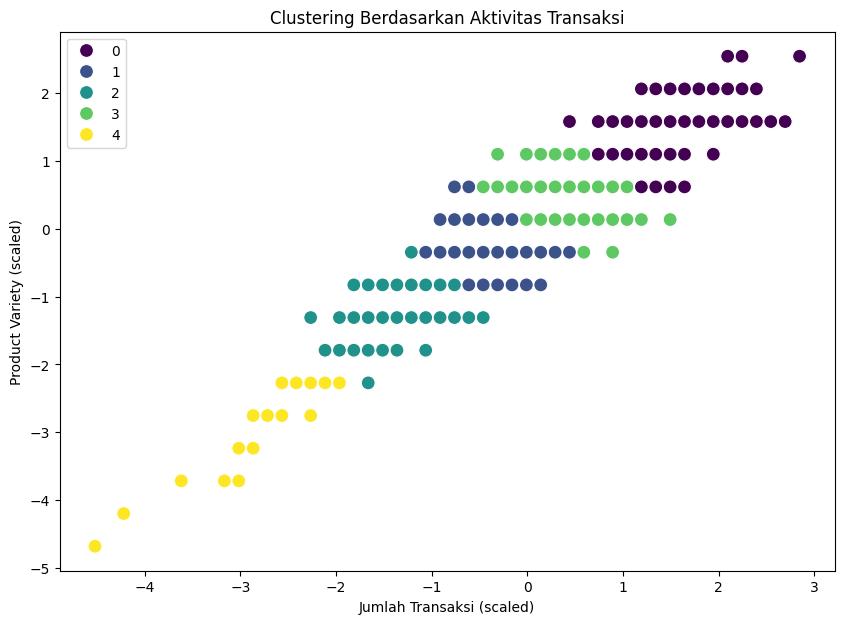

In [ ]:
# Memvisualisasikan cluster
plt.figure(figsize=(10, 7))
sns.scatterplot(x=features_scaled[:, 0], y=features_scaled[:, 1], hue=labels, palette='viridis', s=100)
plt.title('Clustering Berdasarkan Aktivitas Transaksi')
plt.xlabel('Jumlah Transaksi (scaled)')
plt.ylabel('Product Variety (scaled)')
plt.show()

### Mencoba Hyperparameter K-Means

#### n_init = 1

In [ ]:
sample_df = df.sample(n=1000, random_state=42)
# Memilih fitur yang relevan dari sampel
features = sample_df[['jumlah_transaksi', 'product_variety']]

# Normalisasi data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [ ]:
# Menentukan jumlah cluster
num_clusters = 3

# Membuat model K-means
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=1, max_iter=300, init='k-means++', tol=1e-4)

# Fit model ke data
kmeans.fit(features_scaled)

# Mendapatkan label cluster untuk setiap data point
labels = kmeans.labels_

# Menambahkan label cluster ke DataFrame sampel
sample_df['cluster'] = labels

In [ ]:
# Menghitung Silhouette Score
sil_score_init = silhouette_score(features_scaled, labels)
print(f'Silhouette Score: {sil_score_init}')

Silhouette Score: 0.4486279457916739


#### n_init = 5

In [ ]:
sample_df = df.sample(n=1000, random_state=42)
# Memilih fitur yang relevan dari sampel
features = sample_df[['jumlah_transaksi', 'product_variety']]

# Normalisasi data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [ ]:
# Menentukan jumlah cluster
num_clusters = 3

# Membuat model K-means
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=5, max_iter=300, init='k-means++', tol=1e-4)

# Fit model ke data
kmeans.fit(features_scaled)

# Mendapatkan label cluster untuk setiap data point
labels = kmeans.labels_

# Menambahkan label cluster ke DataFrame sampel
sample_df['cluster'] = labels

In [ ]:
# Menghitung Silhouette Score
sil_score_init5 = silhouette_score(features_scaled, labels)
print(f'Silhouette Score: {sil_score_init5}')

Silhouette Score: 0.4486279457916739


#### n_init = 10

In [ ]:
sample_df = df.sample(n=1000, random_state=42)
# Memilih fitur yang relevan dari sampel
features = sample_df[['jumlah_transaksi', 'product_variety']]

# Normalisasi data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [ ]:
# Menentukan jumlah cluster
num_clusters = 3

# Membuat model K-means
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10, max_iter=300, init='k-means++', tol=1e-4)

# Fit model ke data
kmeans.fit(features_scaled)

# Mendapatkan label cluster untuk setiap data point
labels = kmeans.labels_

# Menambahkan label cluster ke DataFrame sampel
sample_df['cluster'] = labels

In [ ]:
# Menghitung Silhouette Score
sil_score_init10 = silhouette_score(features_scaled, labels)
print(f'Silhouette Score: {sil_score_init10}')

Silhouette Score: 0.46296539745703336


#### n-init = 20

In [ ]:
sample_df = df.sample(n=1000, random_state=42)
# Memilih fitur yang relevan dari sampel
features = sample_df[['jumlah_transaksi', 'product_variety']]

# Normalisasi data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [ ]:
# Menentukan jumlah cluster
num_clusters = 3

# Membuat model K-means
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=20, max_iter=300, init='k-means++', tol=1e-4)

# Fit model ke data
kmeans.fit(features_scaled)

# Mendapatkan label cluster untuk setiap data point
labels = kmeans.labels_

# Menambahkan label cluster ke DataFrame sampel
sample_df['cluster'] = labels

In [ ]:
# Menghitung Silhouette Score
sil_score_init20 = silhouette_score(features_scaled, labels)
print(f'Silhouette Score: {sil_score_init20}')

Silhouette Score: 0.46296539745703336


#### Hasil Mencoba Hyper Parameter

In [ ]:
print(f'Silhouette Score n_init = 1: {sil_score_init}')
print(f'Silhouette Score n_init = 5: {sil_score_init5}')
print(f'Silhouette Score n_init = 10: {sil_score_init10}')
print(f'Silhouette Score n_init = 20: {sil_score_init20}')

Silhouette Score n_init = 1: 0.4486279457916739
Silhouette Score n_init = 5: 0.4486279457916739
Silhouette Score n_init = 10: 0.46296539745703336
Silhouette Score n_init = 20: 0.46296539745703336


Dapat dilihat bahwa hypeparameter yang paling cocok adalah n_init = 10

### Hasil Cluster K-Means

In [ ]:
print("Hasil Silhouette Score Cluster 3: ", sil_score3)
print("Hasil Silhouette Score Cluster 4: ", sil_score4)
print("Hasil Silhouette Score Cluster 5: ", sil_score5)

Hasil Silhouette Score Cluster 3:  0.4519503852539241
Hasil Silhouette Score Cluster 4:  0.44745110560362616
Hasil Silhouette Score Cluster 5:  0.4328136703905907


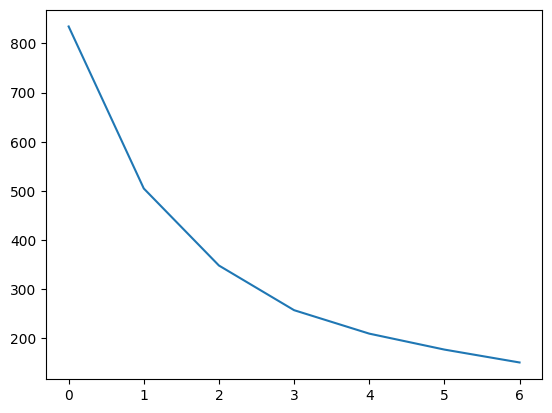

In [ ]:
# Elbow-curve/SSD
# import matplotlib.pyplot as plt
# import seaborn as sns

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans  = KMeans(n_clusters=num_clusters, random_state=42, n_init=10, max_iter=300, init='k-means++')
    kmeans.fit(features_scaled)

    ssd.append(kmeans.inertia_)

# plot the SSDs for each n_clusters
plt.plot(ssd)

Jumlah cluster harusnya 3, dilihat dari grafik di angka 3 mulai melambat penurunannya, membentuk sudut seperti siku.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data_grouped.csv')

In [ ]:
features = df[['jumlah_transaksi', 'product_variety']]

# Normalisasi data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [ ]:
# Menentukan jumlah cluster
num_clusters = 3

# Membuat model K-means dengan parameter tambahan
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10, max_iter=300, init='k-means++', tol=1e-4)

# Fit model ke data
kmeans.fit(features_scaled)

# Mendapatkan label cluster untuk setiap data point
labels = kmeans.labels_

# Menambahkan label cluster ke DataFrame sampel
df['cluster'] = labels

In [ ]:
# Menghitung Silhouette Score
sil_score = silhouette_score(features_scaled, labels)
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.46296539745703336


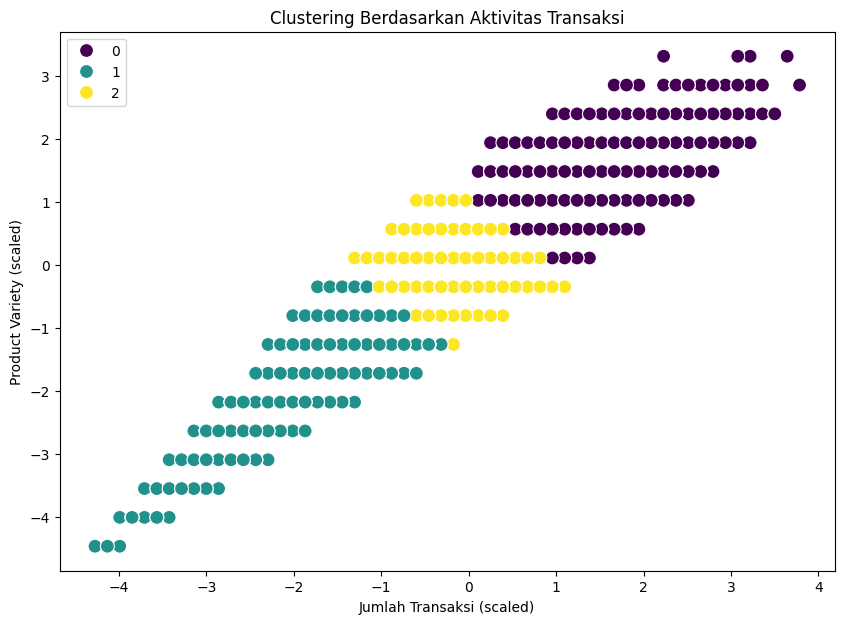

In [ ]:
# Memvisualisasikan cluster
plt.figure(figsize=(10, 7))
sns.scatterplot(x=features_scaled[:, 0], y=features_scaled[:, 1], hue=labels, palette='viridis', s=100)
plt.title('Clustering Berdasarkan Aktivitas Transaksi')
plt.xlabel('Jumlah Transaksi (scaled)')
plt.ylabel('Product Variety (scaled)')
plt.show()

In [ ]:
df.to_csv('/content/drive/MyDrive/data_cluster.csv', index=False)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data_cluster.csv')
df

,user_id,gender,money_spent,refund,wallet_balance,gross_amount,discounts,kode provinsi,nama provinsi,kode kabupaten,nama kabupaten,kode kecamatan,nama kecamatan,jumlah_transaksi,product_variety,transaction_days,cluster
0,SC1801042001002,perempuan,39370000.0,1860000.0,60000.0,1239700.0,105697.0,18,LAMPUNG,1801,LAMPUNG SELATAN,180104,NATAR,31,11,31,2
1,SC1801042001006,perempuan,52360000.0,5780000.0,760000.0,1413998.0,195694.0,18,LAMPUNG,1801,LAMPUNG SELATAN,180104,NATAR,34,12,34,2
2,SC1801042002004,laki-laki,57000000.0,5100000.0,900000.0,1516300.0,153296.0,18,LAMPUNG,1801,LAMPUNG SELATAN,180104,NATAR,30,12,27,2
3,SC1801042002007,laki-laki,58290000.0,8990000.0,690000.0,1720898.0,166393.0,18,LAMPUNG,1801,LAMPUNG SELATAN,180104,NATAR,29,11,29,2
4,SC1801042002008,perempuan,58240000.0,6720000.0,680000.0,1711700.0,177145.0,18,LAMPUNG,1801,LAMPUNG SELATAN,180104,NATAR,28,10,26,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90265,SC6571041003015,perempuan,61090000.0,2870000.0,990000.0,1048398.0,0.0,65,KALIMANTAN UTARA,6571,KOTA TARAKAN,657104,TARAKAN UTARA,41,13,37,0
90266,SC6571041003016,laki-laki,69160000.0,3800000.0,330000.0,1243599.0,0.0,65,KALIMANTAN UTARA,6571,KOTA TARAKAN,657104,TARAKAN UTARA,38,12,35,0
90267,SC6571041003018,perempuan,48300000.0,2100000.0,430000.0,1097200.0,0.0,65,KALIMANTAN UTARA,6571,KOTA TARAKAN,657104,TARAKAN UTARA,35,11,32,2
90268,SC6571041003019,perempuan,67320000.0,5100000.0,360000.0,1312699.0,0.0,65,KALIMANTAN UTARA,6571,KOTA TARAKAN,657104,TARAKAN UTARA,34,13,34,0


## Hierarchical Clustering

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data_grouped.csv')

### Cluster 3

In [ ]:
scaler = StandardScaler()
features = df[['jumlah_transaksi', 'product_variety']]
features_scaled = scaler.fit_transform(features)

In [ ]:
# Mengambil 1000 sampel acak dari data
sample_df = features.sample(n=1000, random_state=42)
sample_scaled = scaler.fit_transform(sample_df)

In [ ]:
# Membuat model Hierarchical Clustering dengan 3 cluster
hierarchical_clustering = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')

# Fit model ke data yang telah distandarisasi
labels = hierarchical_clustering.fit_predict(sample_scaled)

# Menambahkan label cluster ke DataFrame sampel
sample_df['cluster'] = labels

In [ ]:
silhouette_avg3 = silhouette_score(sample_scaled, labels)
print(f"Silhouette Score: {silhouette_avg3}")

Silhouette Score: 0.43794339716714503


### Cluster 4

In [ ]:
scaler = StandardScaler()
features = df[['jumlah_transaksi', 'product_variety']]
features_scaled = scaler.fit_transform(features)

In [ ]:
# Mengambil 1000 sampel acak dari data
sample_df = features.sample(n=1000, random_state=42)
sample_scaled = scaler.fit_transform(sample_df)

In [ ]:
# Membuat model Hierarchical Clustering dengan 4 cluster
hierarchical_clustering = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')

# Fit model ke data yang telah distandarisasi
labels = hierarchical_clustering.fit_predict(sample_scaled)

# Menambahkan label cluster ke DataFrame sampel
sample_df['cluster'] = labels

In [ ]:
silhouette_avg4 = silhouette_score(sample_scaled, labels)
print(f"Silhouette Score: {silhouette_avg4}")

Silhouette Score: 0.4517717600166181


### Cluster 5

In [ ]:
scaler = StandardScaler()
features = df[['jumlah_transaksi', 'product_variety']]
features_scaled = scaler.fit_transform(features)

In [ ]:
# Mengambil 1000 sampel acak dari data
sample_df = features.sample(n=1000, random_state=42)
sample_scaled = scaler.fit_transform(sample_df)

In [ ]:
# Membuat model Hierarchical Clustering dengan 5 cluster
hierarchical_clustering = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')

# Fit model ke data yang telah distandarisasi
labels = hierarchical_clustering.fit_predict(sample_scaled)

# Menambahkan label cluster ke DataFrame sampel
sample_df['cluster'] = labels

In [ ]:
silhouette_avg5 = silhouette_score(sample_scaled, labels)
print(f"Silhouette Score: {silhouette_avg5}")

Silhouette Score: 0.40794605723192223


### Hasil analisis Cluster Hierarchical Clustering

In [ ]:
print(f"Silhouette Score Cluster 3: {silhouette_avg3}")
print(f"Silhouette Score Cluster 4: {silhouette_avg4}")
print(f"Silhouette Score Cluster 5: {silhouette_avg5}")

Silhouette Score Cluster 3: 0.43794339716714503
Silhouette Score Cluster 4: 0.4517717600166181
Silhouette Score Cluster 5: 0.40794605723192223


Dapat dilihat bahwa cluster 3 merupakan cluster yang paling efektif

## HDBSCAN

**HDBSCAN** (Hierarchical Density-Based Spatial Clustering of Applications with Noise) merupakan pengembangan dari metode clustering DBSCAN dengan penambahan konsep hierarchical clustering. HDBSCAN tidak memerlukan penentuan parameter radius seperti DBSCAN sehingga pengguna tidak perlu memikirkan seberapa besar radius yang diperlukan. Perbedaan yang paling mendasar antara HDBSCAN dengan DBSCAN adalah pada fungsi jarak dan konsep hirarki yang dibangun melalui kepadatan antar titik data.

**Kelebihan HDBSCAN**
*   Menangani Kepadatan Berbeda:
Dapat mendeteksi cluster dengan kepadatan yang bervariasi.
*   Deteksi Noise:
Mampu memisahkan noise secara efektif.
*   Parameter Mudah Diatur:
Utamanya membutuhkan parameter min_samples yang lebih mudah diatur dibanding eps pada DBSCAN.
*   Struktur Hierarkis:
Menghasilkan dendrogram untuk fleksibilitas level granularitas clustering.
*   Efisien:
Lebih efisien pada dataset besar dibanding beberapa metode lain.

**Kekurangan HDBSCAN**
*   Kompleksitas:
Lebih kompleks untuk diimplementasikan dan dipahami.
*   Kinerja pada Dimensi Tinggi:
Menurun pada data berdimensi tinggi.
*   Sensitivitas Parameter:
Hasil dapat dipengaruhi oleh pemilihan parameter min_samples.
*   Waktu Komputasi:
Bisa memerlukan waktu komputasi yang signifikan pada dataset besar.
*   Interpretasi Hierarki:
Dendrogram bisa sulit diinterpretasi pada dataset besar atau kompleks.


**Mencari nilai min_cluster_size yang optimal**

Mengevaluasi berbagai nilai min_cluster_size menggunakan Silhouette Score pada data sampel.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import hdbscan

# Ukuran sampel yang diinginkan
sample_size = int(0.10 * fitur_scaled.shape[0])  # 10% dari 90270 adalah 9027
# Mengambil sampel secara acak dari dataset fitur_scaled
fitur_sampled = fitur_scaled.sample(n=sample_size, random_state=42)

# Menentukan rentang nilai min_cluster_size yang akan dicoba
min_cluster_sizes = range(50, 500, 50)  # Contoh rentang nilai dari 50 hingga 450
silhouette_scores = []
num_clusters_list = []

# Mengevaluasi setiap nilai min_cluster_size
for size in min_cluster_sizes:
    clusterer = hdbscan.HDBSCAN(min_cluster_size=size)
    cluster_labels = clusterer.fit_predict(fitur_sampled)

    # Menghitung silhouette score jika ada lebih dari satu cluster
    if len(set(cluster_labels)) > 1:
        score = silhouette_score(fitur_sampled, cluster_labels)
    else:
        score = -1  # Silhouette score tidak valid jika hanya ada satu cluster
    silhouette_scores.append(score)

    # Menghitung jumlah cluster yang terbentuk (mengabaikan noise)
    unique_clusters = np.unique(cluster_labels)
    unique_clusters = unique_clusters[unique_clusters != -1]  # Menghapus noise
    num_clusters = len(unique_clusters)
    num_clusters_list.append(num_clusters)

    print(f"Min cluster size: {size}, Silhouette Score: {score:.2f}, Jumlah cluster: {num_clusters}")

# Memilih min_cluster_size optimal berdasarkan kriteria tertentu
# Misalnya, memilih berdasarkan silhouette score tertinggi
optimal_min_cluster_size = min_cluster_sizes[np.argmax(silhouette_scores)]
print(f"Min cluster size optimal berdasarkan silhouette score: {optimal_min_cluster_size}")


Min cluster size: 50, Silhouette Score: 0.17, Jumlah cluster: 65
Min cluster size: 100, Silhouette Score: 0.00, Jumlah cluster: 13
Min cluster size: 150, Silhouette Score: 0.09, Jumlah cluster: 8
Min cluster size: 200, Silhouette Score: 0.06, Jumlah cluster: 7
Min cluster size: 250, Silhouette Score: 0.03, Jumlah cluster: 6
Min cluster size: 300, Silhouette Score: -0.00, Jumlah cluster: 6
Min cluster size: 350, Silhouette Score: 0.00, Jumlah cluster: 5
Min cluster size: 400, Silhouette Score: -0.04, Jumlah cluster: 5
Min cluster size: 450, Silhouette Score: -0.08, Jumlah cluster: 5
Min cluster size optimal berdasarkan silhouette score: 50


Jika min_cluster size kecil, kemungkinan jumlah cluster yg terbentuk sangat banyak, tapi nilai sihoutte score nya tinggi. Ini percobaan pada dataset asli (bukan sample)

Min cluster size: 5, silhoutte score : 0.98, jumlah cluster : 803

Min cluster size: 50, Silhouette Score: 0.85, Jumlah cluster: 381

Min cluster size: 100, Silhouette Score: 0.75, Jumlah cluster: 275

Min cluster size: 200, Silhouette Score: 0.56, Jumlah cluster: 180

Min cluster size: 500, Silhouette Score: 0.15, Jumlah cluster: 57

Min cluster size: 900, Silhouette Score: 0.02, Jumlah cluster: 13

Min cluster size: 1800, Silhouette Score: 0.07, Jumlah cluster: 7

**Fit model HDBSCAN dengan nilai optimal min_cluster_size**

In [ ]:
# Fit model HDBSCAN menggunakan min_cluster_size optimal
clusterer = hdbscan.HDBSCAN(min_cluster_size=optimal_min_cluster_size)
cluster_labels = clusterer.fit_predict(fitur_scaled)

In [ ]:
# Menghitung silhouette score untuk model akhir
if len(set(cluster_labels)) > 1:
    silhouette_avg = silhouette_score(fitur_scaled, cluster_labels)
    print(f"Silhouette Score akhir dengan min_cluster_size optimal: {silhouette_avg:.2f}")
else:
    silhouette_avg = -1  # Berikan nilai -1 jika hanya ditemukan satu cluster
    print("Silhouette Score akhir: N/A - hanya ditemukan satu cluster")

Silhouette Score akhir dengan min_cluster_size optimal: 0.85


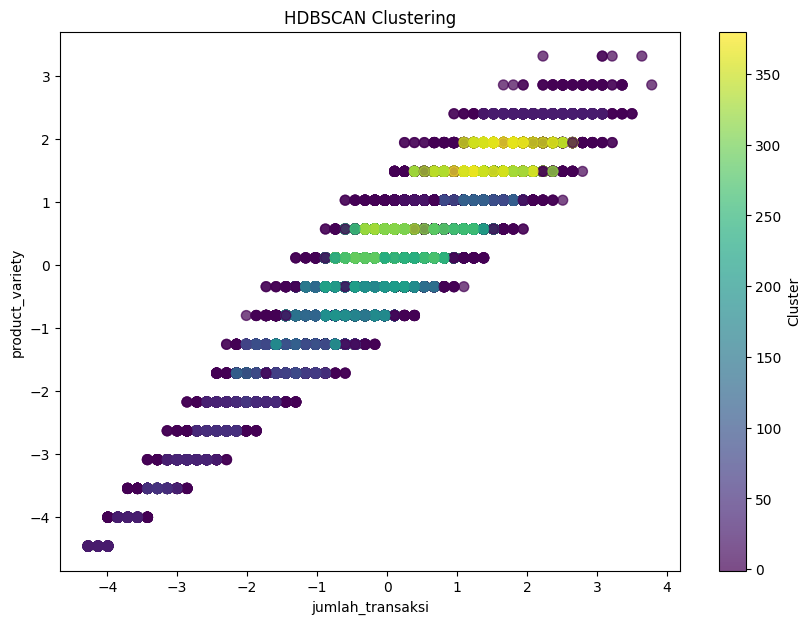

In [ ]:
# Memastikan fitur_scaled adalah numpy array
if isinstance(fitur_scaled, pd.DataFrame):
    fitur_scaled = fitur_scaled.values

# Plot hasil clustering
plt.figure(figsize=(10, 7))
plt.scatter(fitur_scaled[:, 0], fitur_scaled[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('HDBSCAN Clustering')
plt.xlabel('jumlah_transaksi')
plt.ylabel('product_variety')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
# Evaluasi Jumlah Cluster
num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
print("Jumlah Cluster:", num_clusters)

Jumlah Cluster: 381


In [ ]:
# Membuat DataFrame dari label-cluster dan menghitung jumlah cluster
df_cluster = pd.DataFrame({'Label Cluster': cluster_labels})
cluster_counts = df_cluster['Label Cluster'].value_counts().reset_index()
cluster_counts.columns = ['Label Cluster', 'Jumlah Cluster']

# Menampilkan DataFrame
print("Label cluster dan jumlah clusternya:\n", cluster_counts)


Label cluster dan jumlah clusternya:
      Label Cluster  Jumlah Cluster
0               -1            4680
1              243             963
2              211             878
3              250             868
4              206             824
5              168             816
6              238             801
7              287             764
8              251             704
9              208             692
10             293             691
11             207             686
12             306             669
13             314             665
14             173             656
15              56             649
16             289             647
17              32             643
18             204             642
19             244             636
20             264             630
21             189             624
22             191             622
23             282             620
24             188             614
25             234             600
26             28

In [ ]:
# Memasukkan hasil clustering ke tabel
selected_columns['Cluster_Id'] = cluster_labels
selected_columns.head()

<ipython-input-157-1201b91f20ab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['Cluster_Id'] = cluster_labels


,user_id,jumlah_transaksi,product_variety,transaction_days,Cluster_Id
0,SC1801042001002,31,11,31,242
1,SC1801042001006,34,12,34,304
2,SC1801042002004,30,12,27,230
3,SC1801042002007,29,11,29,281
4,SC1801042002008,28,10,26,158


**Pada algoritma HDBSCAN, dengan parameter min_cluster_size = 50 menghasilkan nilai silhoutte score = 0.85 dengan jumlah cluster = 381**

meskipun algoritma HDBSCAN menghasilkan nilai silhoutte score tinggi, algoritma ini tidak kami pilih, alasan tidak mengunakan HDBSCAN krna terlalu rumit untuk analisis hasil clusternya

# HASIL ANALISIS

## Analisis Cluster

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data_cluster.csv')

In [ ]:
# Analisis statistik deskriptif per cluster
selected_columns = ['jumlah_transaksi', 'product_variety']
cluster_summary = df[selected_columns + ['cluster']].groupby('cluster').mean()
print("Rata-rata setiap fitur per cluster:\n")
cluster_summary

Rata-rata setiap fitur per cluster:



,jumlah_transaksi,product_variety
cluster,,
0,39.796948,13.034644
1,22.275618,7.654695
2,31.599658,10.620848


In [ ]:
# Menambahkan analisis statistik deskriptif lainnya
cluster_std = df[selected_columns + ['cluster']].groupby('cluster').std()
print("Standar deviasi setiap fitur per cluster:\n")
cluster_std

Standar deviasi setiap fitur per cluster:



,jumlah_transaksi,product_variety
cluster,,
0,3.488719,1.010805
1,4.873949,1.659305
2,2.774597,0.871556


<Figure size 1000x800 with 0 Axes>

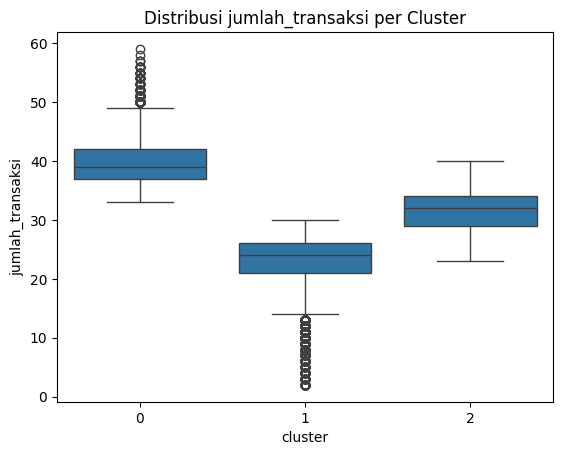

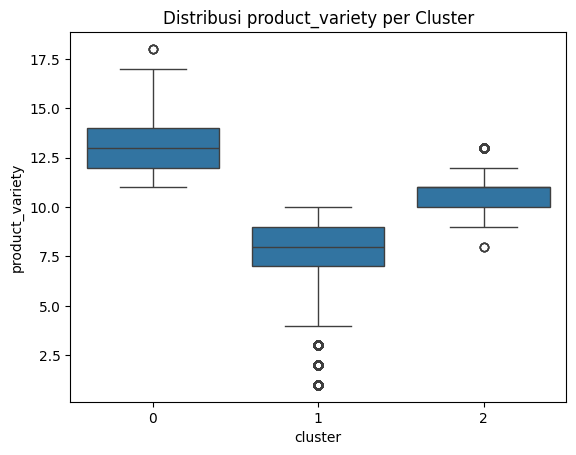

In [ ]:
# Profiling cluster dengan visualisasi
plt.figure(figsize=(10, 8))
for feature in selected_columns:
    plt.figure()
    sns.boxplot(x='cluster', y=feature, data=df)
    plt.title(f'Distribusi {feature} per Cluster')
    plt.show()

In [ ]:
# Menyimpulkan karakteristik/pola dari cluster
for cluster_id in cluster_summary.index:
    print(f"Karakteristik Cluster {cluster_id}:")
    print(f"Rata-rata jumlah transaksi: {cluster_summary.loc[cluster_id, 'jumlah_transaksi']:.2f}")
    print(f"Rata-rata variasi produk: {cluster_summary.loc[cluster_id, 'product_variety']:.2f}")
    print("\n")

Karakteristik Cluster 0:
Rata-rata jumlah transaksi: 39.80
Rata-rata variasi produk: 13.03


Karakteristik Cluster 1:
Rata-rata jumlah transaksi: 22.28
Rata-rata variasi produk: 7.65


Karakteristik Cluster 2:
Rata-rata jumlah transaksi: 31.60
Rata-rata variasi produk: 10.62




## Kesimpulan

Dari hasil karakteristik diatas, kita bisa menyimpulkan :

**Cluster 0** terdiri dari pelanggan dengan jumlah transaksi yang tinggi. Mereka cenderung membeli variasi produk yang lebih banyak dibandingkan dengan cluster lainnya. Pelanggan dalam cluster ini juga memiliki frekuensi transaksi yang lebih sering, menunjukkan bahwa mereka adalah pelanggan yang sangat aktif.

**Cluster 1** terdiri dari pelanggan dengan jumlah transaksi yang rendah. Mereka cenderung membeli variasi produk yang lebih sedikit dan memiliki frekuensi transaksi yang lebih jarang. Pelanggan dalam cluster ini mungkin adalah pelanggan baru atau pelanggan yang kurang aktif.

**Cluster 2** terdiri dari pelanggan dengan jumlah transaksi yang sedang. Mereka cenderung membeli variasi produk yang sedang (tidak terlalu banyak, namun juga tidak sedikit). Aktivitas transaksi mereka tersebar cukup merata sepanjang bulan. Pelanggan Aktif.

## Rekomendasi

Rekomendasi berdasarkan karakteristik cluster :

1. Cluster 0:

- Strategi Promosi: Mereka adalah pelanggan yang sangat aktif, sehingga promosi yang melibatkan bundling produk, diskon untuk pembelian dalam jumlah besar, atau penawaran eksklusif dapat meningkatkan retensi dan volume transaksi.
- Kustomisasi Penawaran: Personalisasi penawaran berdasarkan riwayat pembelian mereka untuk meningkatkan pengalaman berbelanja mereka.

2. Cluster 1:

- Strategi Promosi: Mereka mungkin membutuhkan lebih banyak insentif untuk berbelanja. Pertimbangkan kampanye reaktivasi seperti email khusus, penawaran diskon pertama, atau sampel gratis untuk mendorong mereka kembali berbelanja.
- Edukasi Produk: Berikan informasi tentang manfaat dan penggunaan produk untuk meningkatkan minat dan variasi produk yang dibeli.

3. Cluster 2:

- Strategi Promosi: Fokus pada peningkatan loyalitas dengan menawarkan program penghargaan dan diskon untuk mendorong mereka bertransaksi lebih sering.
- Produk Baru: Perkenalkan produk baru yang mungkin menarik minat mereka untuk mencoba dan meningkatkan variasi produk yang mereka beli.